In [3]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath('')))


from utils import *
import utils as ut

In [4]:
whos

Variable                 Type        Data/Info
----------------------------------------------
ADASYN                   ABCMeta     <class 'imblearn.over_sampling._adasyn.ADASYN'>
BaseEstimator            type        <class 'sklearn.base.BaseEstimator'>
BorderlineSMOTE          ABCMeta     <class 'imblearn.over_sam<...>.filter.BorderlineSMOTE'>
DecisionTreeClassifier   ABCMeta     <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
GridSearchCV             ABCMeta     <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
KFold                    ABCMeta     <class 'sklearn.model_selection._split.KFold'>
KMeansSMOTE              ABCMeta     <class 'imblearn.over_sam<...>ote.cluster.KMeansSMOTE'>
LGBMClassifier           type        <class 'lightgbm.sklearn.LGBMClassifier'>
LinearSVC                type        <class 'sklearn.svm._classes.LinearSVC'>
LogisticRegression       type        <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
MinMaxScaler             type        <cla

### 이상 index drop

In [5]:
df = pd.read_csv("../../insurance_fraud_detect_data.csv")

# 41개 삭제
strange = [43, 1504, 1762, 11706, 12031, 12665, 480, 4515, 4651, 8596, 9904, 10635, 11104, 11120, 11994, 12956,
      12972, 14533, 14792, 15242, 209, 268, 12132, 8477, 12705, 8514, 532, 4158, 5401, 13077, 4595, 6839,
      11710, 12377, 15080, 1115, 5398, 5790, 9523, 9528, 12050]
socar = df.drop(strange)

socar.columns = ["c_"+str(i) for i in range(1,26)]
socar

,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,...,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24,c_25
0,0,2,1,3,0,2,0,100,2,0,...,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,...,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,...,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,...,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,...,1209410,1,0,0,2,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,2,0,2,0,2,0,100,2,0,...,0,1,1,0,1,0,0,0,-1,0
15996,0,2,0,2,1,4,0,100,1,1,...,0,2,1,0,1,0,0,0,-1,0
15997,0,2,1,2,0,4,0,100,1,0,...,0,0,0,0,1,0,0,0,-1,1
15998,0,2,0,2,0,2,0,100,2,0,...,0,4,1,0,1,0,0,0,-1,0


## 첫번째 ( SMOTE, 스케일링 없음, PCA)
### (1) 데이터 분리, (2) SMOTE, (3) 스케일링 없음

In [6]:
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar)
# sampling to SMOTE (default)
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='SMOTE')

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]


### (4) PCA 결과를 return하는 함수 만듬

In [8]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=17):  # 23개의 컬럼을 17개로 축소.
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)
    
    return pca.transform(ss_data), pca

### X_train PCA

In [9]:
socar_train_pca, train_pca = get_pca_data(X_train_over, n_components=17)

In [10]:
socar_train_pca.shape

(25608, 17)

### X_test PCA

In [11]:
socar_test_pca, test_pca = get_pca_data(X_test, n_components=17)

In [12]:
socar_test_pca.shape

(3121, 17)

### (5) PCA 결과를 pandas로 정리

In [13]:
def get_pd_from_pca(pca_data, cols=['component_1',
                                    'component_2',
                                    'component_3',
                                    'component_4',
                                    'component_5',
                                    'component_6',
                                    'component_7',
                                    'component_8',
                                    'component_9',
                                    'component_10',
                                    'component_11',
                                    'component_12',
                                    'component_13',
                                    'component_14',
                                    'component_15',
                                    'component_16',
                                    'component_17']):
    return pd.DataFrame(pca_data, columns=cols)

### X_train PCA ==> DataFrame

In [14]:
socar_train_pca_pd = get_pd_from_pca(socar_train_pca)

In [15]:
socar_train_pca_pd

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17
0,-845943.700116,-1.235764e+05,-7.356881,1.143455,0.726824,0.135071,0.382591,0.411916,0.066405,-0.670892,-0.214314,0.409866,-0.454104,0.075716,0.208667,0.611944,-0.565935
1,-802133.473415,1.086385e+06,96.296870,1.402796,1.387961,-0.011037,1.651438,1.010934,0.209344,1.390495,-0.920381,0.992525,0.000783,-0.420801,-0.884680,0.420530,-0.570756
2,376922.780949,2.261800e+05,-5.735519,-3.177109,1.061571,-1.301929,-1.060460,-0.015671,-0.538313,-0.725273,0.715540,-0.211505,0.361721,0.113240,0.497184,0.007072,-0.122471
3,365825.981054,-2.977921e+05,-7.252481,-0.016352,-3.343261,3.488887,-0.170034,-0.877190,0.823551,0.194028,0.184909,-0.825516,-1.035739,0.041489,0.098286,0.516051,-0.604836
4,-850656.866253,-2.537458e+05,92.285023,2.263808,-1.129861,-0.235799,1.917091,-1.711976,0.475784,-0.316974,-0.472772,-0.003977,1.005773,0.534510,-0.507287,-0.296294,-0.154801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25603,175124.717384,2.576368e+04,-6.386915,1.921229,-0.146111,-0.360760,0.780540,-0.922817,0.910303,-0.518961,-0.093636,0.174659,-0.584288,-0.485000,0.404617,-0.245728,-0.048230
25604,-850656.866203,-2.537458e+05,-7.764625,1.470811,-1.122168,-0.633527,-1.233340,0.506589,-0.592478,0.578055,-0.025388,-0.456447,0.312817,-0.029408,-0.737693,0.024903,0.077497
25605,221622.775561,-4.436055e+04,-6.581733,1.789534,-1.400283,-1.121160,0.168160,-1.468278,0.356380,-0.337706,-0.060060,0.340040,0.182728,-0.124851,0.193182,-0.118389,-0.021033
25606,480153.063312,-3.019317e+05,-7.245272,-2.574686,-1.745979,-0.510024,0.058084,-0.022859,1.662920,-1.093823,0.099102,-0.241329,0.346667,-0.039291,0.201119,-0.133810,0.017605


### X_test PCA ==> DataFrame

In [16]:
socar_test_pca_pd = get_pd_from_pca(socar_test_pca)

In [17]:
socar_test_pca_pd

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17
0,-9.588728e+05,-256839.796243,86.215308,1.370367,3.343832,-0.114374,1.293302,-0.308081,0.616268,0.129090,0.425779,-1.016825,0.493512,-0.372124,-0.433119,0.326783,0.761286
1,1.196701e+07,-468432.468227,-8.072499,-0.480555,4.667459,1.500694,0.808319,0.663606,0.739232,0.409684,0.470328,-0.846781,0.401132,-0.469732,-0.271467,0.585535,0.173687
2,3.815004e+06,-430384.177886,-12.462530,-3.541294,-0.866906,-0.054126,-0.931016,-0.231496,0.901151,-0.791238,0.116809,0.541614,-0.031914,-0.644156,-0.567538,-0.081836,0.254833
3,-6.992994e+05,1963.519739,-11.483016,0.769979,-2.470857,-0.034504,1.889591,2.783566,-0.141712,0.422812,0.870496,1.014141,0.153495,0.119325,0.091471,0.561946,-0.359732
4,-9.371731e+05,340079.670941,-8.857257,-2.168120,0.243682,1.439004,0.891345,0.660453,-1.026624,-1.476178,-0.787422,0.563169,-0.179286,-0.739008,0.189216,-0.461619,0.479540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,7.487192e+05,-318915.762538,-13.283789,-2.794481,0.372449,-1.643067,-0.087353,1.478922,-2.019022,0.071901,0.843221,-0.724747,-0.381756,0.076347,0.322526,-0.330602,-0.355718
3117,-9.588728e+05,-256839.795417,-13.802140,-2.976799,-0.046989,2.893134,-0.655004,1.577345,-2.266137,1.499225,0.776630,0.371651,0.115660,-0.751145,0.139335,-0.277869,0.198074
3118,-1.364680e+05,63343.074086,-10.664510,-0.342598,-3.290843,-1.630020,-0.581460,0.098871,0.865595,-0.208192,-0.054658,0.332943,-0.276823,0.234977,0.050985,-0.107104,-0.378076
3119,-9.194070e+05,828789.901454,-4.840299,3.538563,1.080616,2.225282,-0.769617,-0.003932,0.913636,0.986473,1.138802,0.018648,0.414868,0.304309,0.149747,-0.196468,-0.338569


### 모델링

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


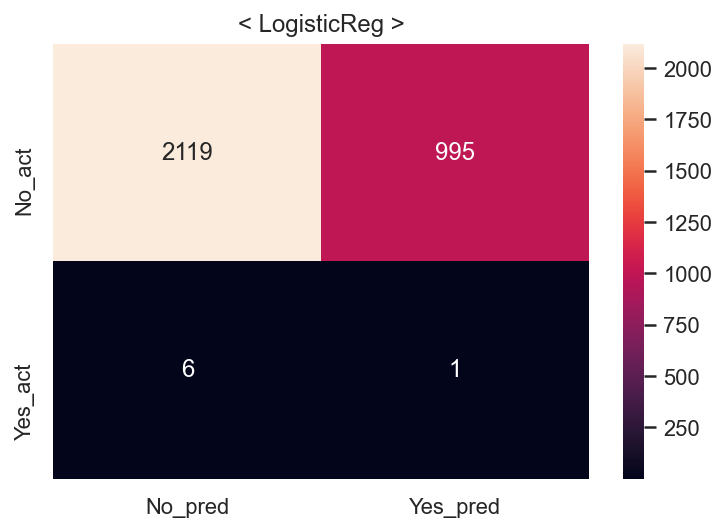

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


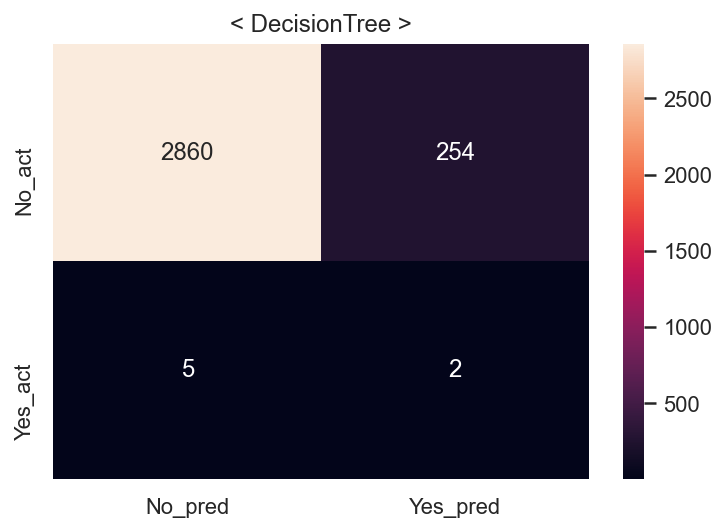

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


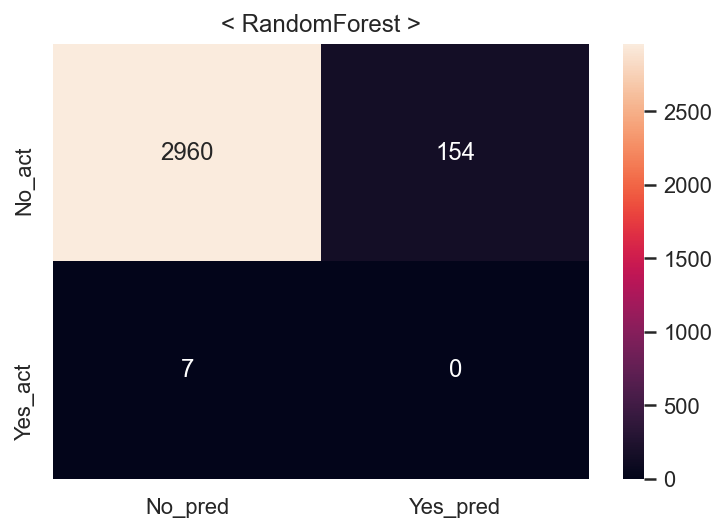

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


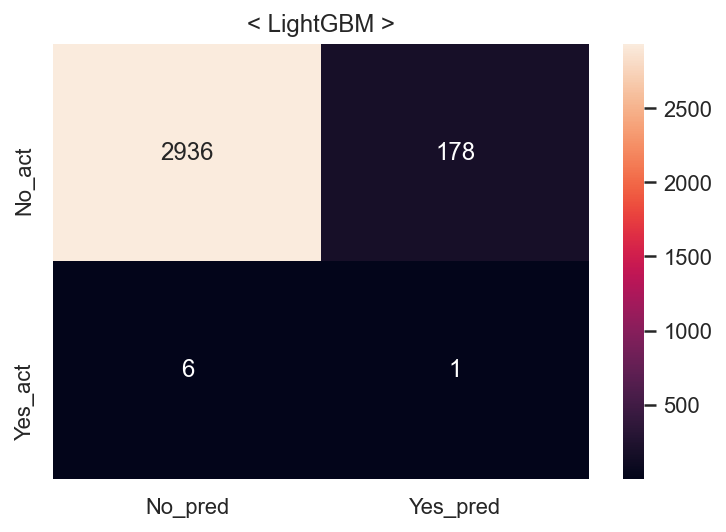

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


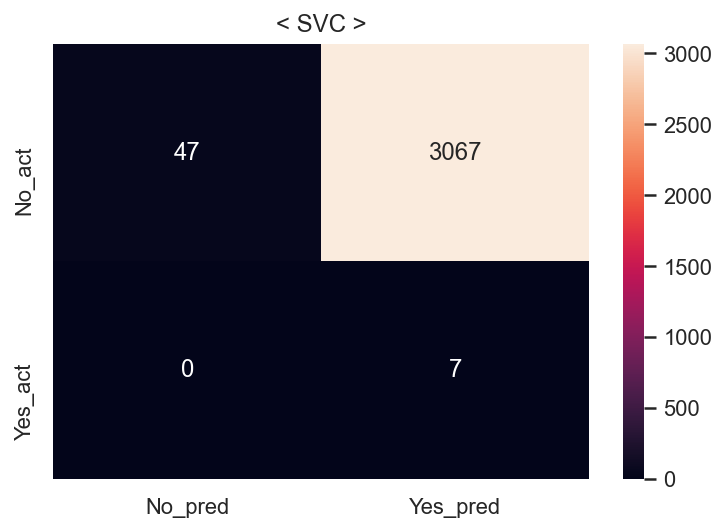

Fit time : 8.59 min


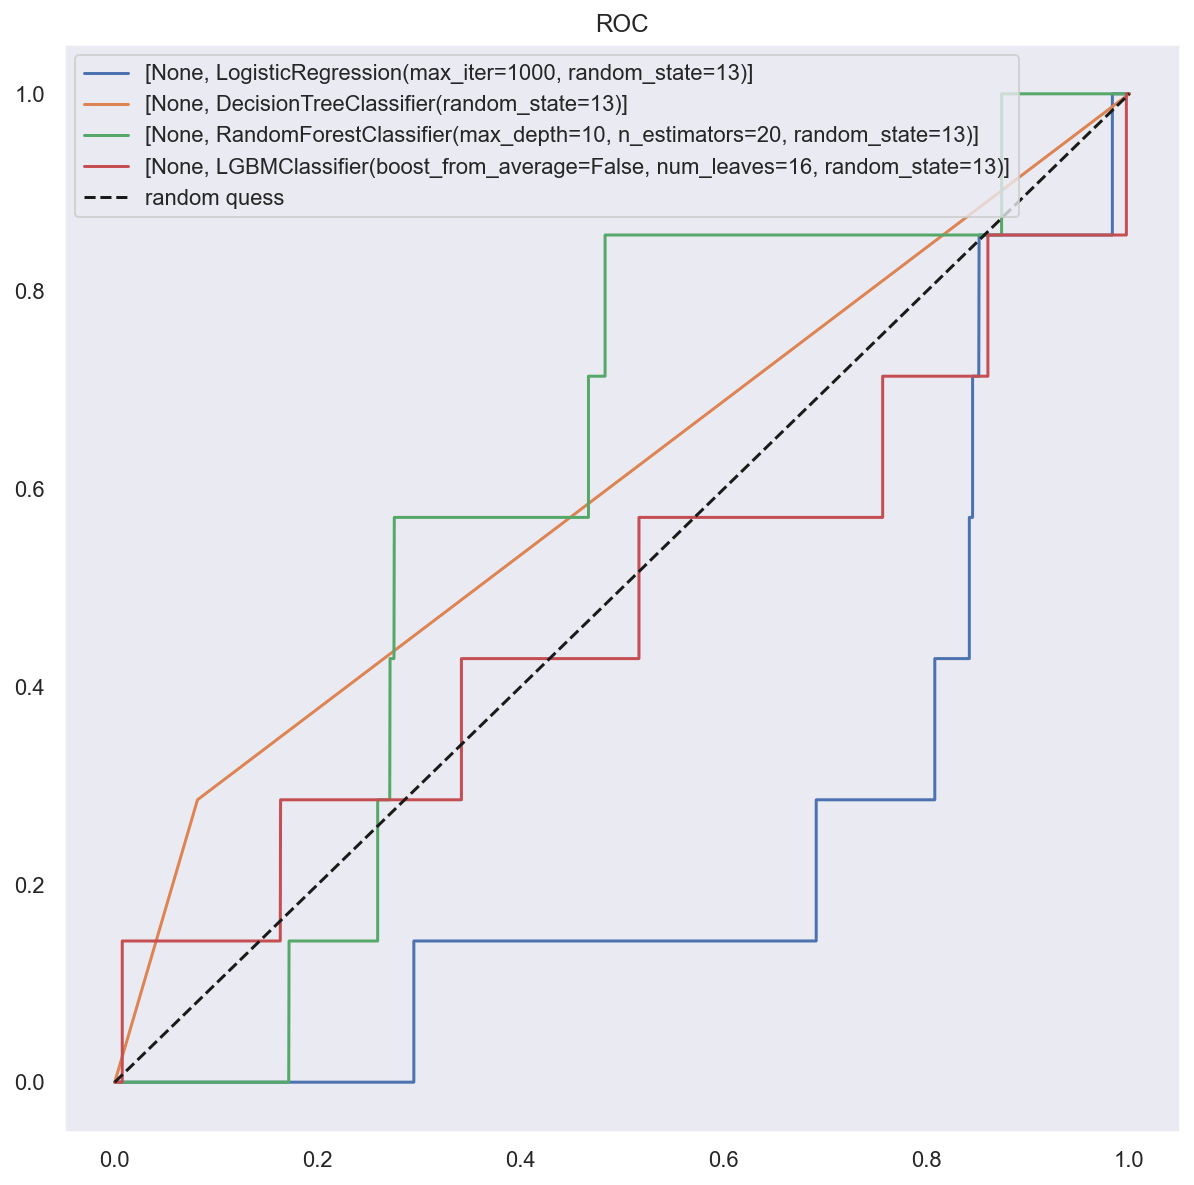

In [22]:
cv_list, result_df = ut.fit_cv(socar_train_pca_pd, y_train_over, socar_test_pca_pd, y_test, scaler='No')

In [23]:
result_df

,classifier,train accuracy,train precision,train recall,train f1,train auc,test accuracy,test precision,test recall,test f1,test auc
0,LogisticReg,0.500000,0.500000,0.325601,0.394381,0.500000,0.679269,0.001004,0.142857,0.001994,0.411666
1,DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000,0.917014,0.007812,0.285714,0.015209,0.602074
2,RandomForest,0.970829,0.945467,0.999297,0.971637,0.970829,0.948414,0.000000,0.000000,0.000000,0.475273
3,LightGBM,0.994611,0.990930,0.998360,0.994631,0.994611,0.941045,0.005587,0.142857,0.010753,0.542848
4,SVC,0.505623,0.502828,1.000000,0.669175,0.505623,0.017302,0.002277,1.000000,0.004544,0.507547


In [24]:
result_df["PCA"] = [1]  * len(result_df)
result_df["encoded"] = [0]  * len(result_df)
result_df["scaler"] = ["None"]  * len(result_df)
result_df["sampler"] = ["SMOTE"]  * len(result_df)
result_df = result_df[['PCA', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df

,PCA,encoded,scaler,sampler,classifier,train accuracy,train precision,train recall,train f1,train auc,test accuracy,test precision,test recall,test f1,test auc
0,1,0,None,SMOTE,LogisticReg,0.500000,0.500000,0.325601,0.394381,0.500000,0.679269,0.001004,0.142857,0.001994,0.411666
1,1,0,None,SMOTE,DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000,0.917014,0.007812,0.285714,0.015209,0.602074
2,1,0,None,SMOTE,RandomForest,0.970829,0.945467,0.999297,0.971637,0.970829,0.948414,0.000000,0.000000,0.000000,0.475273
3,1,0,None,SMOTE,LightGBM,0.994611,0.990930,0.998360,0.994631,0.994611,0.941045,0.005587,0.142857,0.010753,0.542848
4,1,0,None,SMOTE,SVC,0.505623,0.502828,1.000000,0.669175,0.505623,0.017302,0.002277,1.000000,0.004544,0.507547


## 두번째 (SMOTE, MinMax 스케일링, PCA)
### (1) 데이터 분리, (2) SMOTE

In [19]:
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar)
# sampling to SMOTE (default)
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='SMOTE')


==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]


### (3) 스케일링 (MinMax)

In [20]:
X_train_over

,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,...,c_15,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24
0,2,1,3,0,2,0,100,2,0,0,...,1.302547e+05,0,1,0,0,1,0,0,0,-1
1,3,1,3,0,4,0,0,2,0,0,...,1.341009e+06,0,3,1,0,1,0,0,0,-1
2,1,0,1,0,1,0,100,1,0,0,...,5.240306e+05,1209410,1,0,0,2,0,0,0,-1
3,1,1,3,0,4,0,100,3,0,0,...,0.000000e+00,1217280,0,0,0,1,1,2,1,2
4,2,0,4,0,4,0,0,1,0,0,...,0.000000e+00,0,1,0,0,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25603,2,0,3,0,2,0,100,2,0,0,...,3.164435e+05,1014996,1,0,0,1,1,1,1,0
25604,1,0,1,0,2,0,100,1,0,0,...,0.000000e+00,0,0,1,0,1,0,0,0,0
25605,2,0,2,0,2,0,100,1,0,0,...,2.480477e+05,1064001,0,0,0,1,1,1,1,1
25606,1,0,3,0,1,0,100,1,0,0,...,0.000000e+00,1331682,0,0,0,1,1,1,1,1


In [23]:
from sklearn.preprocessing import MinMaxScaler

X_train_mm = MinMaxScaler().fit_transform(X_train_over)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train_over.columns)
X_test_mm = MinMaxScaler().fit_transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)

### (4) PCA

- X_train PCA / X_test PCA

In [24]:
# X_train_over => MinMax scaling => socar_train_pca2
socar_train_pca2, train_pca2 = get_pca_data(X_train_mm, n_components=17)
# X_test =>  MinMax scaling => socar_test_pca2
socar_test_pca2, test_pca2 = get_pca_data(X_test_mm, n_components=17)

In [25]:
socar_train_pca2.shape, socar_test_pca2.shape

((25608, 17), (3121, 17))

### (5) PCA 결과를 pandas로 정리

In [26]:
def get_pd_from_pca(pca_data, cols=['component_1',
                                    'component_2',
                                    'component_3',
                                    'component_4',
                                    'component_5',
                                    'component_6',
                                    'component_7',
                                    'component_8',
                                    'component_9',
                                    'component_10',
                                    'component_11',
                                    'component_12',
                                    'component_13',
                                    'component_14',
                                    'component_15',
                                    'component_16',
                                    'component_17']):
    return pd.DataFrame(pca_data, columns=cols)

### X_train PCA ==> DataFrame

In [27]:
socar_train_pca_pd2 = get_pd_from_pca(socar_train_pca2)

In [28]:
socar_train_pca_pd2

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17
0,-0.177931,-0.383070,0.155273,0.319010,0.456356,0.428027,-0.184172,-0.503433,-0.190701,0.310248,0.231841,-0.010352,0.066364,-0.036735,-0.023456,0.035307,0.005329
1,-0.285507,0.350840,0.997306,0.075616,0.229378,0.527518,0.330030,-0.506946,-0.278849,0.237049,0.003728,0.954193,0.381974,-0.049683,-0.198409,0.157560,-0.036096
2,-0.365026,-0.134878,-0.768030,-0.418093,0.064065,-0.031926,0.104937,-0.152611,0.074389,0.131516,-0.038207,-0.128860,0.082486,0.057075,0.024912,-0.078433,-0.019246
3,1.344715,-0.063579,0.709601,0.133275,0.340560,0.308091,-0.577514,-0.215820,-0.524906,0.431289,0.136465,-0.095530,-0.239358,0.337069,-0.023448,-0.157547,0.316025
4,1.107898,-0.107692,0.265228,0.225197,-0.402414,-0.088155,0.233570,-0.283447,-0.093552,-0.420322,-0.212357,0.636274,0.546788,0.082655,-0.126691,0.015457,-0.152975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25603,0.860750,0.009006,-0.053967,0.211394,0.186304,-0.276640,-0.230310,-0.102131,0.093874,-0.137802,0.008860,-0.024520,0.009701,-0.214311,0.012553,0.054532,-0.094595
25604,-0.518901,0.648206,-0.024867,0.374962,-0.277541,0.031406,-0.041539,0.273825,-0.175491,0.066994,-0.084219,-0.013641,0.012877,0.029825,-0.013322,-0.100471,-0.003676
25605,0.863636,0.103667,-0.399624,0.304091,-0.203323,-0.133195,-0.102438,-0.038801,-0.022673,-0.037883,0.000443,-0.072748,0.103289,-0.180140,-0.005443,0.084746,-0.098636
25606,0.833238,0.198619,-0.705204,-0.119038,0.171960,0.221471,-0.139639,0.018922,0.046034,-0.315916,-0.134532,-0.116741,-0.071462,0.112183,0.023744,-0.027899,-0.089061


### X_test PCA ==> DataFrame

In [29]:
socar_test_pca_pd2 = get_pd_from_pca(socar_test_pca2)

In [30]:
socar_test_pca_pd2

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17
0,1.066822,0.632209,0.653334,-0.353109,-0.118542,0.497430,0.843865,-0.555194,0.018696,-0.422854,0.616555,0.049249,-0.185677,-0.049655,-0.188547,-0.192402,-0.042125
1,0.753911,0.436386,1.260029,-0.159843,0.240092,-0.163891,0.149891,-0.142187,0.114760,0.296010,0.101873,0.767588,-0.345700,0.225798,-0.480977,-0.191659,-0.070972
2,0.423382,-1.044875,0.030947,0.472738,-0.710983,0.106227,0.151009,0.530586,0.888638,-0.055974,-0.287853,0.116715,0.312044,0.087330,-0.121939,-0.041658,-0.021237
3,0.747809,0.805081,0.380714,-0.032245,-0.433909,0.129624,-0.578912,0.047026,0.343422,0.033829,-0.530081,-0.096225,0.609118,0.262347,0.402583,0.198614,-0.112683
4,-0.628964,-0.476537,0.426098,0.133344,-0.134787,-0.522455,0.520208,0.557287,0.290190,-0.799066,-0.135809,0.063891,0.084817,-0.031745,-0.030116,0.027189,0.004884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,0.615126,0.208155,-0.177697,-0.482155,-0.321273,-0.653523,-0.329959,0.107868,-0.205111,0.048799,-0.327811,-0.257632,-0.009329,-0.203301,-0.256970,-0.121652,-0.105671
3117,-0.522972,-0.172216,0.566711,-0.654455,-0.512968,-0.606970,0.308751,-0.011013,-0.390567,-0.034889,-0.229129,-0.170959,0.322322,0.524228,-0.197163,0.130436,0.060209
3118,0.388982,-0.501805,-0.637564,0.331340,-0.124677,-0.017010,-0.436988,0.122906,-0.190155,0.261776,-0.099225,-0.054786,-0.062568,-0.146013,0.387000,0.090815,-0.098548
3119,-0.632434,0.207984,-0.144143,-0.907691,0.253389,0.293110,-0.358454,-0.019870,-0.011135,0.112733,0.215759,0.242391,-0.000428,0.386231,-0.038074,0.088925,-0.018832


### 모델링

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


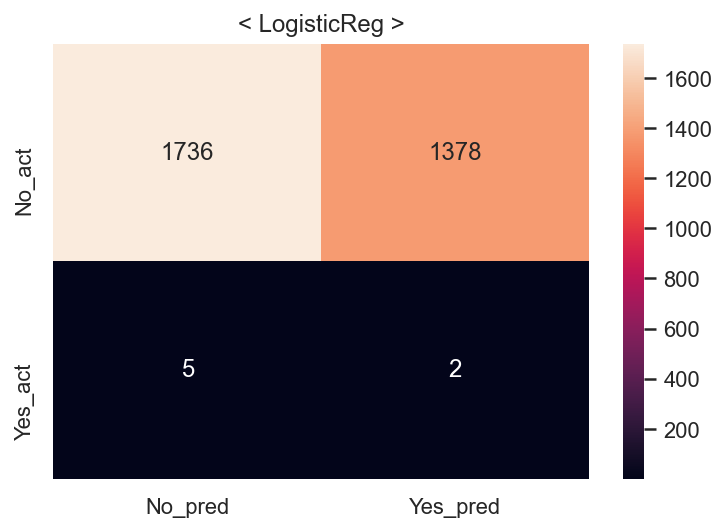

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


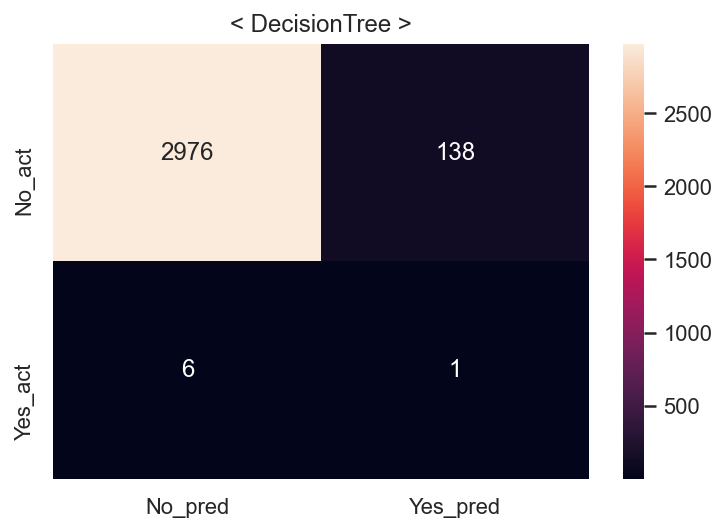

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


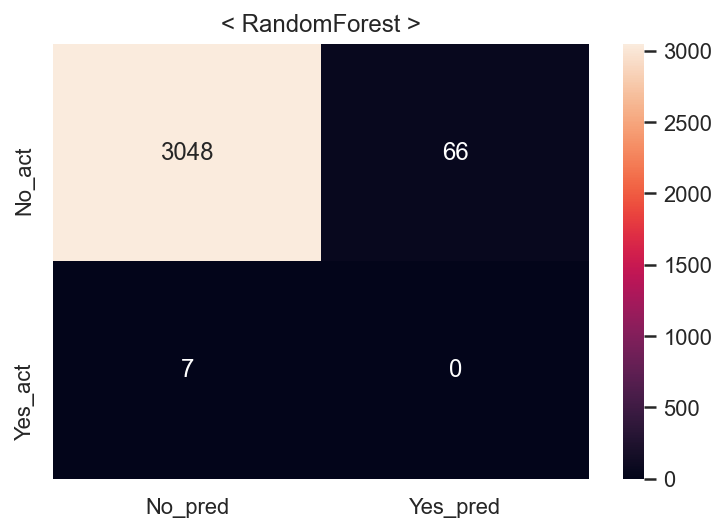

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


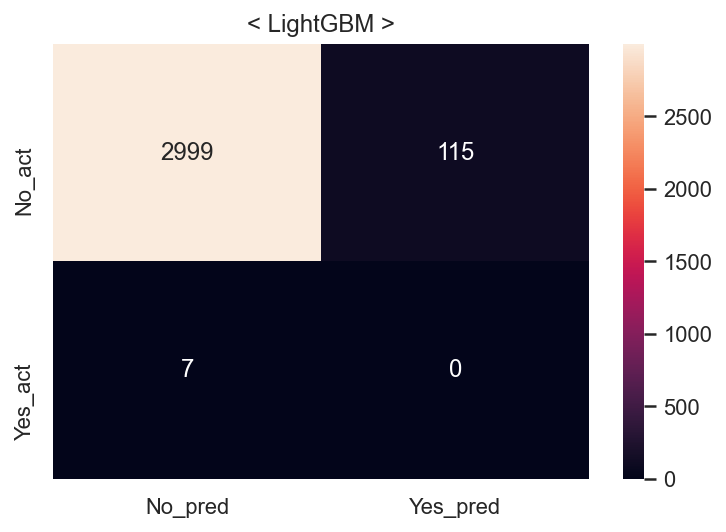

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


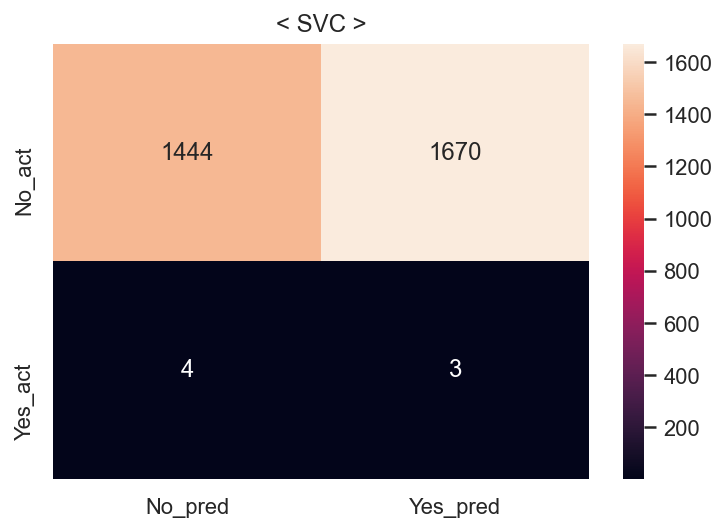

Fit time : 0.89 min


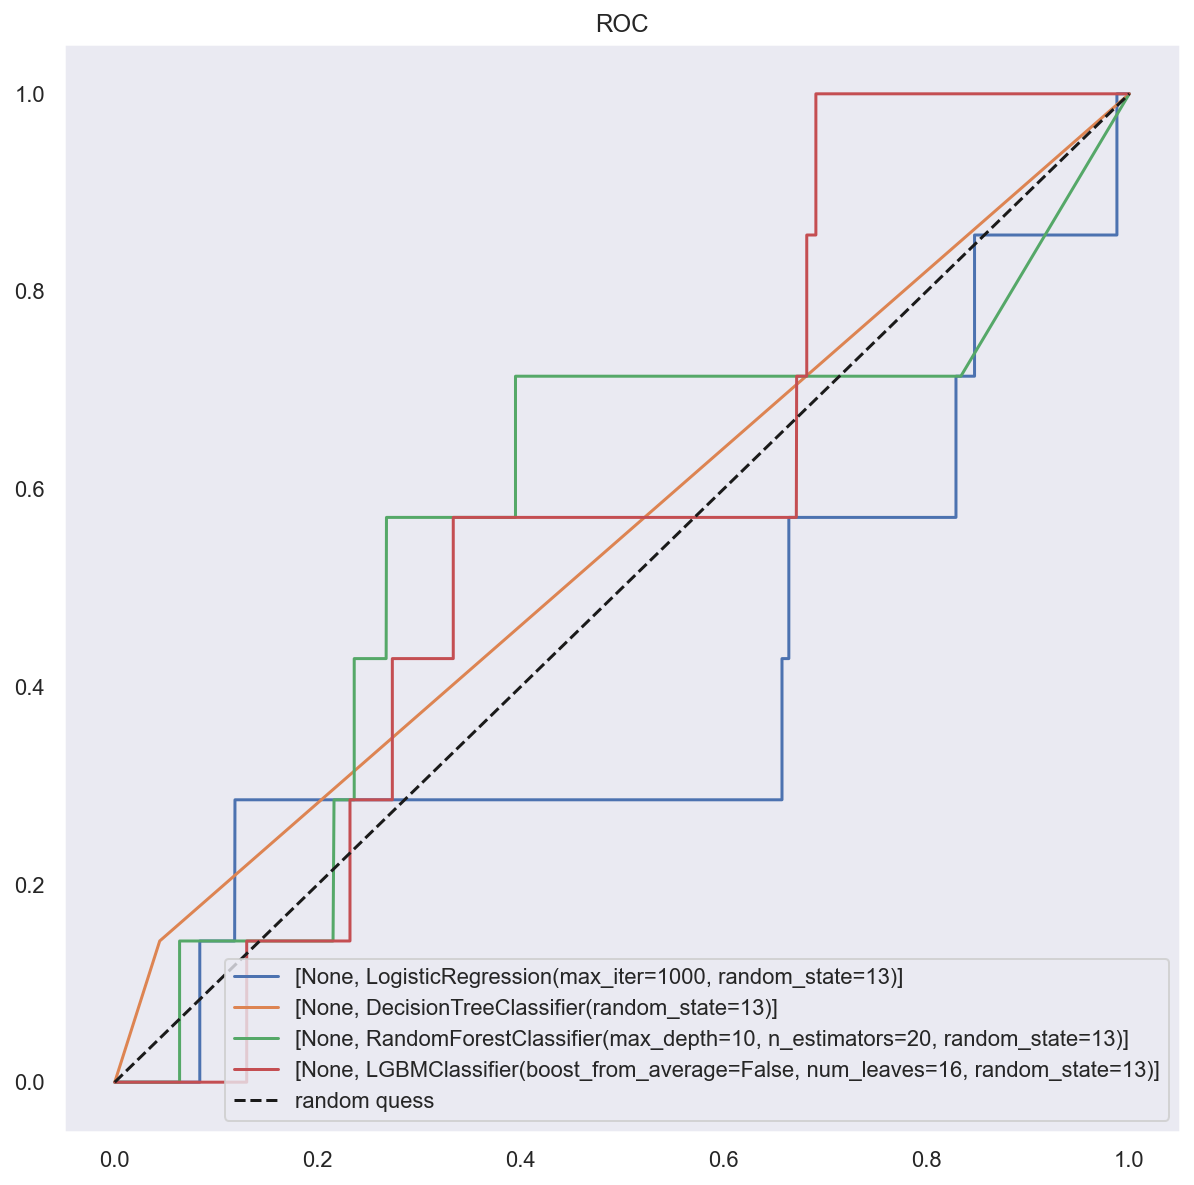

In [35]:
cv_list2, result_df2 = ut.fit_cv(socar_train_pca_pd2, y_train_over, socar_test_pca_pd2, y_test, scaler='No')

In [36]:
result_df2["PCA"] = [1]  * len(result_df2)
result_df2["encoded"] = [0]  * len(result_df2)
result_df2["scaler"] = ["MM"]  * len(result_df2)
result_df2["sampler"] = ["SMOTE"]  * len(result_df2)
result_df2 = result_df2[['PCA', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df2

,PCA,encoded,scaler,sampler,classifier,train accuracy,train precision,train recall,train f1,train auc,test accuracy,test precision,test recall,test f1,test auc
0,1,0,MM,SMOTE,LogisticReg,0.809474,0.781208,0.859731,0.818591,0.809474,0.556873,0.001449,0.285714,0.002884,0.421598
1,1,0,MM,SMOTE,DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000,0.953861,0.007194,0.142857,0.013699,0.549271
2,1,0,MM,SMOTE,RandomForest,0.954389,0.916941,0.999297,0.956350,0.954389,0.976610,0.000000,0.000000,0.000000,0.489403
3,1,0,MM,SMOTE,LightGBM,0.985786,0.974302,0.997891,0.985956,0.985786,0.960910,0.000000,0.000000,0.000000,0.481535
4,1,0,MM,SMOTE,SVC,0.969658,0.945742,0.996485,0.970451,0.969658,0.463633,0.001793,0.428571,0.003571,0.446142


## 세번째 (SMOTE, Standard 스케일링, PCA)
### (1) 데이터 분리, (2) SMOTE

In [31]:
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar)
# sampling to SMOTE (default)
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='SMOTE')


==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]


### (3) 스케일링 (Standard)

In [32]:
X_train_over

,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,...,c_15,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24
0,2,1,3,0,2,0,100,2,0,0,...,1.302547e+05,0,1,0,0,1,0,0,0,-1
1,3,1,3,0,4,0,0,2,0,0,...,1.341009e+06,0,3,1,0,1,0,0,0,-1
2,1,0,1,0,1,0,100,1,0,0,...,5.240306e+05,1209410,1,0,0,2,0,0,0,-1
3,1,1,3,0,4,0,100,3,0,0,...,0.000000e+00,1217280,0,0,0,1,1,2,1,2
4,2,0,4,0,4,0,0,1,0,0,...,0.000000e+00,0,1,0,0,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25603,2,0,3,0,2,0,100,2,0,0,...,3.164435e+05,1014996,1,0,0,1,1,1,1,0
25604,1,0,1,0,2,0,100,1,0,0,...,0.000000e+00,0,0,1,0,1,0,0,0,0
25605,2,0,2,0,2,0,100,1,0,0,...,2.480477e+05,1064001,0,0,0,1,1,1,1,1
25606,1,0,3,0,1,0,100,1,0,0,...,0.000000e+00,1331682,0,0,0,1,1,1,1,1


In [33]:
from sklearn.preprocessing import StandardScaler

X_train_ss = StandardScaler().fit_transform(X_train_over)
X_train_ss = pd.DataFrame(X_train_ss, columns=X_train_over.columns)
X_test_ss = StandardScaler().fit_transform(X_test)
X_test_ss = pd.DataFrame(X_test_ss, columns=X_test.columns)

### (4) PCA

- X_train PCA / X_test PCA

In [34]:
# X_train_over => MinMax scaling => socar_train_pca2
socar_train_pca3, train_pca3 = get_pca_data(X_train_ss, n_components=17)
# X_test =>  MinMax scaling => socar_test_pca2
socar_test_pca3, test_pca3 = get_pca_data(X_test_ss, n_components=17)

In [35]:
socar_train_pca3.shape, socar_test_pca3.shape

((25608, 17), (3121, 17))

### (5) PCA 결과를 pandas로 정리

In [42]:
def get_pd_from_pca(pca_data, cols=['component_1',
                                    'component_2',
                                    'component_3',
                                    'component_4',
                                    'component_5',
                                    'component_6',
                                    'component_7',
                                    'component_8',
                                    'component_9',
                                    'component_10',
                                    'component_11',
                                    'component_12',
                                    'component_13',
                                    'component_14',
                                    'component_15',
                                    'component_16',
                                    'component_17']):
    return pd.DataFrame(pca_data, columns=cols)

### X_train PCA ==> DataFrame

In [36]:
socar_train_pca_pd3 = get_pd_from_pca(socar_train_pca3)

In [37]:
socar_train_pca_pd3

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17
0,-1.023874,1.448807,-1.087824,-0.159218,0.277459,1.116623,-0.847707,1.740719,0.576788,-0.251655,-1.361247,-0.722115,0.845744,-0.090855,-0.955956,-0.288519,-0.754643
1,-0.708673,3.513292,1.166048,-0.145491,-0.571599,0.001606,0.284282,3.086272,0.326299,-1.441325,-0.356518,1.416847,1.693124,-0.621970,-2.594650,2.697766,-0.625241
2,-1.525338,-2.183341,1.332875,-0.252113,-0.531670,0.091577,0.041335,0.439572,0.981998,0.321894,0.358359,-0.251261,-0.408952,0.100617,-0.161248,-0.410876,0.547713
3,4.807750,1.053153,-0.709277,-0.875222,1.758994,2.087388,-0.609907,0.583334,-0.103830,-0.645473,-0.774677,-0.264128,0.341580,0.586660,-0.907806,-0.704636,-2.448117
4,4.107954,1.831657,-0.708424,-0.047035,-1.959214,0.002891,0.279499,-0.140088,-0.616721,-0.629466,1.589691,0.292664,0.473832,0.659674,-2.025499,2.233995,1.427650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25603,2.507810,0.362255,-0.389747,0.812045,-0.661555,0.636262,-0.482441,-0.082269,-0.673660,-0.173828,-0.643713,-0.456029,-0.380869,0.230170,0.449736,0.141890,0.006180
25604,-0.947068,-1.036800,-1.579658,1.010302,0.875863,-0.572257,0.758187,-0.114669,-0.220397,-0.370065,1.047373,0.615102,-0.017666,-0.130423,-0.137584,-0.300785,-0.519297
25605,2.991788,-0.712976,-1.027221,1.264720,-0.672816,-0.083529,-0.777775,-0.170163,-0.052999,0.162889,0.017934,0.047958,0.104910,0.162640,0.108485,-0.117635,0.344137
25606,2.998951,-2.043965,-0.738418,-0.857582,0.386994,0.503044,0.129953,0.456562,0.411088,0.217126,0.018275,-0.634832,-0.623781,0.479289,0.470847,0.069126,0.938635


### X_test PCA ==> DataFrame

In [38]:
socar_test_pca_pd3 = get_pd_from_pca(socar_test_pca3)

In [39]:
socar_test_pca_pd3

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17
0,2.408996,-2.468615,0.866284,-1.172771,-0.088368,1.586039,-0.397275,-0.117826,-1.438914,1.940519,-1.921895,0.593109,-0.585706,-0.903232,-0.052350,1.733032,-0.259162
1,2.153908,-0.952605,3.909518,0.715880,-1.748222,-0.311660,-1.504739,0.310607,-0.045354,-0.855314,-0.006059,2.461759,-0.765900,-0.882271,0.794002,1.457582,-1.381060
2,1.480948,1.050631,-1.254939,3.075671,2.127420,-1.209641,1.108611,0.450608,0.632861,-0.933041,-0.438497,0.821009,-1.980987,0.787254,1.157104,0.649667,-0.437384
3,1.915676,-1.842751,0.930216,-0.018783,2.311807,-0.607658,0.008639,0.659573,-0.433581,-1.809099,0.217496,-1.229880,0.020426,2.076848,0.266350,-0.624318,-0.354191
4,-1.889303,0.389190,0.014931,1.114189,-0.338644,-1.458318,1.424421,2.111644,0.365330,-0.245410,-0.928037,-0.189165,-1.747473,-0.662941,0.465839,0.189589,0.321257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,1.794627,-0.213971,-0.959789,0.081519,-1.154366,-0.130500,-0.350357,0.673907,-1.343826,0.004825,1.940841,-0.563248,-0.764093,0.328933,0.522351,-0.965341,-0.329992
3117,-1.823920,0.414088,-0.139429,0.080681,-1.060226,-0.888906,0.179294,2.030280,-2.195443,-0.596270,0.162686,0.315424,0.923549,1.464077,1.236595,0.128180,-1.015636
3118,1.491304,1.191556,-1.485198,0.614123,0.369493,-0.268191,0.063920,-0.507873,0.479559,-0.364598,0.865141,-0.678197,0.813999,-0.353540,-0.613356,-0.751933,0.598533
3119,-2.020680,1.004039,1.757553,-1.674337,0.592625,1.793552,0.021706,0.712694,-0.384951,-0.757608,-0.743886,0.741860,0.955614,0.206761,0.012461,-0.910349,0.477705


### (6) 모델링

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


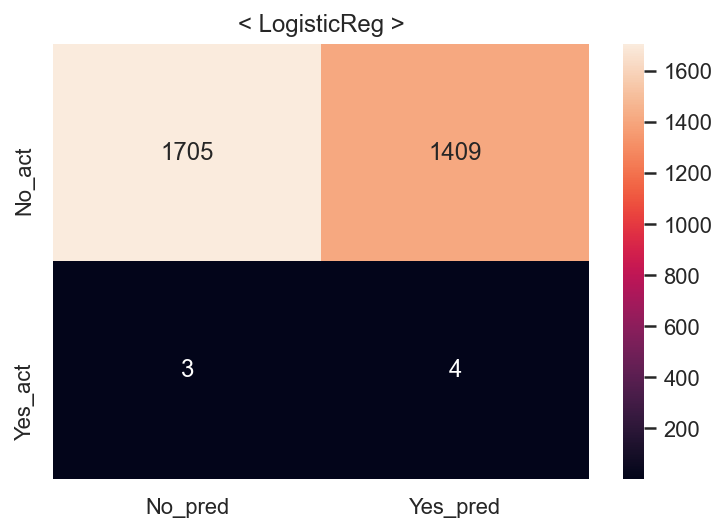

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


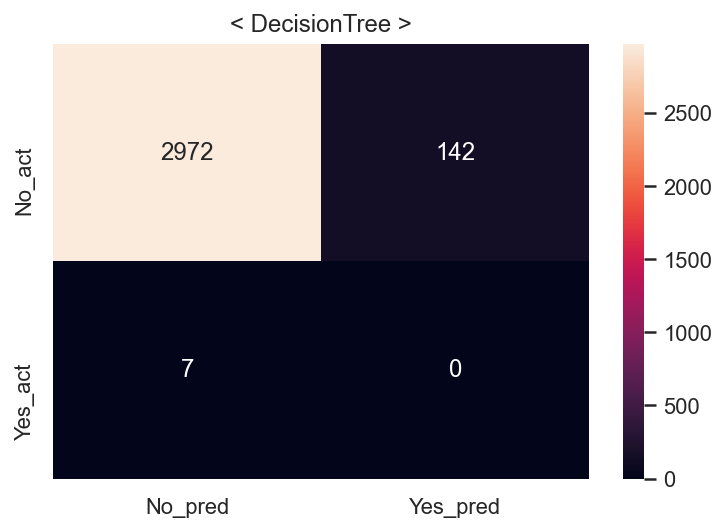

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


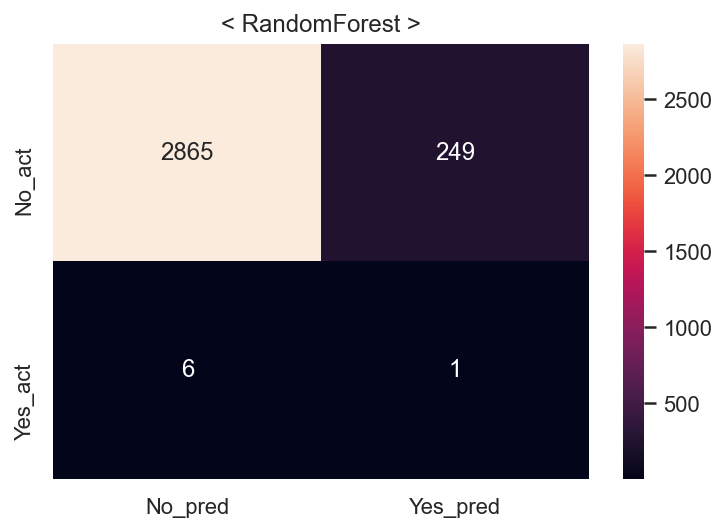

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


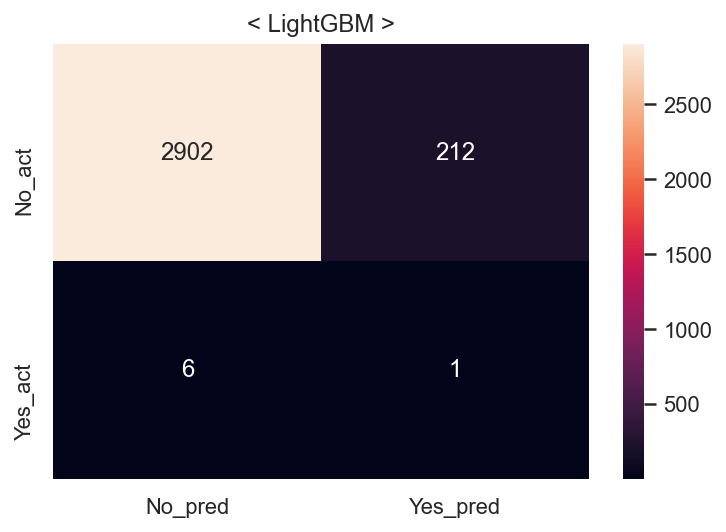

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


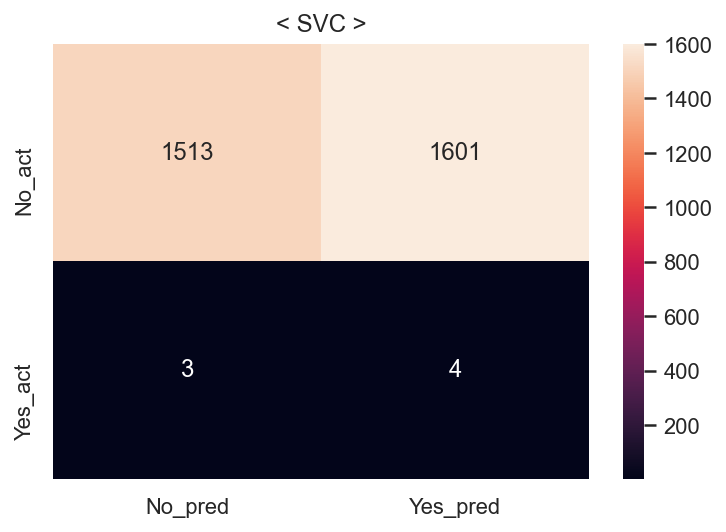

Fit time : 0.76 min


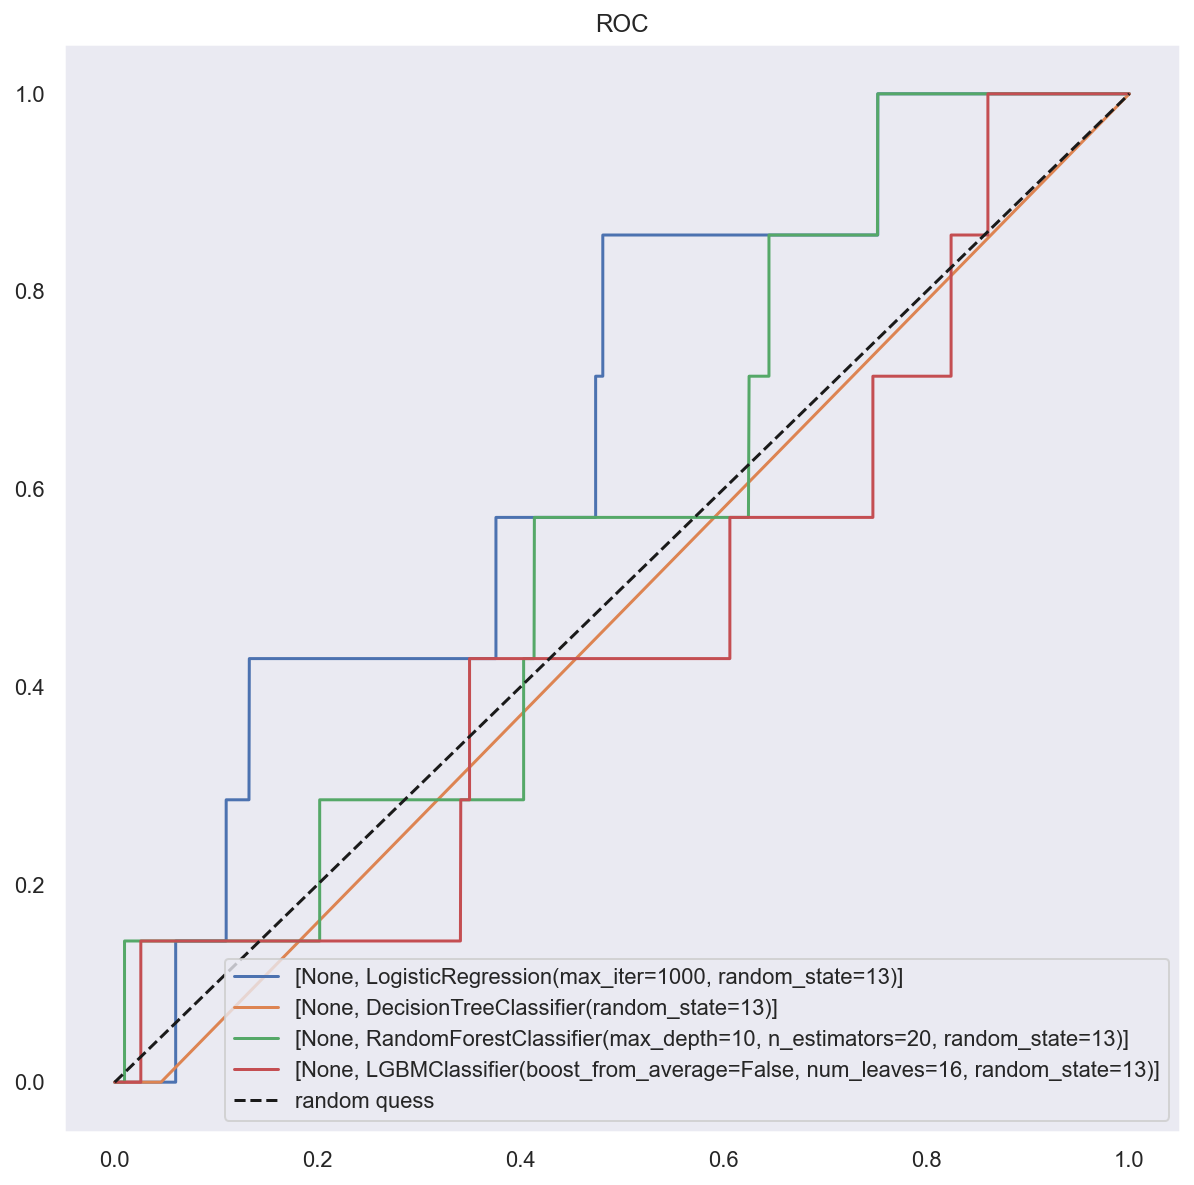

In [47]:
cv_list3, result_df3 = ut.fit_cv(socar_train_pca_pd3, y_train_over, socar_test_pca_pd3, y_test, scaler='No')

In [48]:
result_df3["PCA"] = [1]  * len(result_df3)
result_df3["encoded"] = [0]  * len(result_df3)
result_df3["scaler"] = ["SD"]  * len(result_df3)
result_df3["sampler"] = ["SMOTE"]  * len(result_df3)
result_df3 = result_df3[['PCA', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df3

,PCA,encoded,scaler,sampler,classifier,train accuracy,train precision,train recall,train f1,train auc,test accuracy,test precision,test recall,test f1,test auc
0,1,0,SD,SMOTE,LogisticReg,0.824781,0.798164,0.869416,0.832268,0.824781,0.547581,0.002831,0.571429,0.005634,0.559478
1,1,0,SD,SMOTE,DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000,0.952259,0.000000,0.000000,0.000000,0.477200
2,1,0,SD,SMOTE,RandomForest,0.969970,0.944063,0.999141,0.970821,0.969970,0.918295,0.004000,0.142857,0.007782,0.531448
3,1,0,SD,SMOTE,LightGBM,0.990511,0.983748,0.997501,0.990577,0.990511,0.930151,0.004695,0.142857,0.009091,0.537389
4,1,0,SD,SMOTE,SVC,0.971337,0.948832,0.996407,0.972038,0.971337,0.486062,0.002492,0.571429,0.004963,0.528649


## 네번째 (SMOTE, Robust 스케일링, PCA)
### (1) 데이터 분리, (2) SMOTE

In [40]:
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar)
# sampling to SMOTE (default)
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='SMOTE')


==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]


### (3) 스케일링 (Robust)

In [41]:
X_train_over

,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,...,c_15,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24
0,2,1,3,0,2,0,100,2,0,0,...,1.302547e+05,0,1,0,0,1,0,0,0,-1
1,3,1,3,0,4,0,0,2,0,0,...,1.341009e+06,0,3,1,0,1,0,0,0,-1
2,1,0,1,0,1,0,100,1,0,0,...,5.240306e+05,1209410,1,0,0,2,0,0,0,-1
3,1,1,3,0,4,0,100,3,0,0,...,0.000000e+00,1217280,0,0,0,1,1,2,1,2
4,2,0,4,0,4,0,0,1,0,0,...,0.000000e+00,0,1,0,0,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25603,2,0,3,0,2,0,100,2,0,0,...,3.164435e+05,1014996,1,0,0,1,1,1,1,0
25604,1,0,1,0,2,0,100,1,0,0,...,0.000000e+00,0,0,1,0,1,0,0,0,0
25605,2,0,2,0,2,0,100,1,0,0,...,2.480477e+05,1064001,0,0,0,1,1,1,1,1
25606,1,0,3,0,1,0,100,1,0,0,...,0.000000e+00,1331682,0,0,0,1,1,1,1,1


In [42]:
from sklearn.preprocessing import RobustScaler

X_train_rs = RobustScaler().fit_transform(X_train_over)
X_train_rs = pd.DataFrame(X_train_rs, columns=X_train_over.columns)
X_test_rs = RobustScaler().fit_transform(X_test)
X_test_rs = pd.DataFrame(X_test_rs, columns=X_test.columns)

### (4) PCA

- X_train PCA / X_test PCA

In [43]:
# X_train_over => MinMax scaling => socar_train_pca2
socar_train_pca4, train_pca4 = get_pca_data(X_train_rs, n_components=17)
# X_test =>  MinMax scaling => socar_test_pca2
socar_test_pca4, test_pca4 = get_pca_data(X_test_rs, n_components=17)

In [44]:
socar_train_pca4.shape, socar_test_pca4.shape

((25608, 17), (3121, 17))

### (5) PCA 결과를 pandas로 정리

In [54]:
def get_pd_from_pca(pca_data, cols=['component_1',
                                    'component_2',
                                    'component_3',
                                    'component_4',
                                    'component_5',
                                    'component_6',
                                    'component_7',
                                    'component_8',
                                    'component_9',
                                    'component_10',
                                    'component_11',
                                    'component_12',
                                    'component_13',
                                    'component_14',
                                    'component_15',
                                    'component_16',
                                    'component_17']):
    return pd.DataFrame(pca_data, columns=cols)

### X_train PCA ==> DataFrame

In [45]:
socar_train_pca_pd4 = get_pd_from_pca(socar_train_pca4)

In [46]:
socar_train_pca_pd4

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17
0,-6.563692,-1.079561,-0.233293,0.680252,-0.376334,0.543650,-0.191549,-0.531213,-0.135160,0.002979,0.102711,0.479281,0.208449,-0.045481,0.054051,0.549595,-0.607011
1,93.422951,-0.011725,3.780731,0.968996,-0.244897,0.399085,-0.228387,-1.392617,0.087855,0.354636,0.796449,-0.427265,-0.626983,0.678322,-0.386033,0.356615,-0.595723
2,-6.588122,0.383003,0.877982,0.346895,-0.702767,-0.988908,0.429273,0.918304,0.656912,0.027346,-0.287589,0.466069,0.283892,-0.399570,0.113493,0.017180,-0.127494
3,-6.547180,0.549197,-1.611418,-2.186551,1.727718,1.362121,-1.234540,0.605307,-0.610729,-0.306204,-0.045803,-0.332365,0.010043,0.075629,0.783245,0.414682,-0.622834
4,93.451315,-0.154550,-0.723354,-1.569808,1.191985,0.040009,0.426482,-0.526280,-0.501792,0.651729,-0.530816,-0.262337,0.366415,0.577265,-0.592085,-0.300744,-0.130577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25603,-6.560987,0.219725,-0.145121,-0.525397,0.947299,0.604089,-0.158130,-0.387749,-0.302449,-0.091869,0.065499,0.743928,-0.291931,-0.408463,-0.207466,-0.236039,-0.027025
25604,-6.571159,-1.053105,-1.018052,-0.572585,-0.717886,-0.553478,0.466018,0.170273,-0.426056,-0.550102,0.109394,-0.673195,-0.282325,0.484683,-0.039633,0.029440,0.070968
25605,-6.565325,0.301170,-0.706396,-1.797416,0.807089,-0.018716,0.574622,-0.481240,-0.132468,-0.060783,-0.162218,0.286208,-0.061055,-0.242384,-0.247167,-0.101184,-0.018278
25606,-6.567710,0.523713,-1.424988,-1.611054,0.729016,-0.702711,-0.048512,0.573948,-0.050246,0.540949,0.378418,0.643471,0.167000,0.062659,0.217699,-0.154855,0.051169


### X_test PCA ==> DataFrame

In [47]:
socar_test_pca_pd4 = get_pd_from_pca(socar_test_pca4)

In [48]:
socar_test_pca_pd4

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17
0,88.902850,-0.576660,0.079158,1.280399,0.075551,0.078883,-1.008127,0.895782,-0.601172,0.569721,0.556040,-0.509761,-0.589600,-0.198299,0.493575,0.784009,-0.242780
1,-11.330973,19.830448,-1.133577,1.691677,0.424759,-0.017178,-0.809043,0.629822,0.027247,1.512157,0.633645,-0.780068,-0.757360,0.103196,0.417254,0.196464,0.150828
2,-11.178712,6.234831,-1.354353,0.545983,-0.435317,-0.825383,0.927884,-0.248769,0.775708,-0.639285,0.162524,-0.533060,0.144010,-0.064597,0.139520,0.379352,0.731004
3,-11.092823,-1.229750,-0.108471,0.589735,-1.362934,1.209076,0.841099,-0.157686,0.068785,0.652414,-0.262667,0.405145,0.996977,-0.371394,0.502696,-0.435140,-0.129984
4,-11.117358,-1.709384,0.871005,1.567448,0.596459,-0.047697,0.404365,-0.462969,0.541071,0.145610,-0.868135,-0.758217,0.089924,-0.069903,-0.488102,0.501047,0.634083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,-11.116795,1.150257,-1.124453,-0.397537,-0.946126,-1.094902,0.119597,-0.286192,-0.522245,0.595643,-0.883050,0.129554,-0.386648,-0.609688,-0.187960,-0.436456,-0.023007
3117,-11.111740,-1.797178,-0.704777,-1.274733,0.964681,-0.144434,0.685026,-0.462832,1.090423,1.459499,-0.662557,-0.585724,0.046900,-0.830493,-0.085471,0.174088,-0.315012
3118,-11.111370,-0.293772,-0.115647,-0.617642,-1.133216,-0.271966,0.504175,-0.397293,0.034495,-1.005174,0.064120,0.458970,0.677383,0.035333,-0.116341,-0.394089,-0.047457
3119,-11.134167,-1.626417,2.363220,-0.620218,0.704910,1.196950,-0.706878,0.014820,0.753055,0.267738,0.745054,0.401259,-0.419542,-0.408689,0.070111,-0.355235,-0.012970


### (6) 모델링

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.3s
====Done Evaluation====
====Done Evaluation====


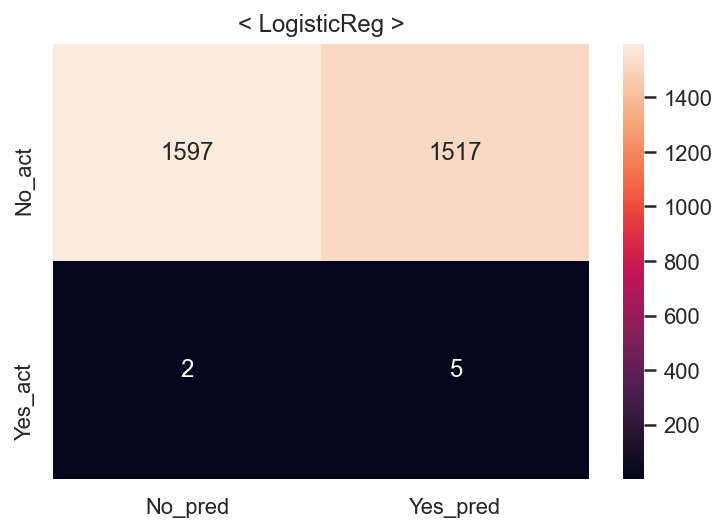

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


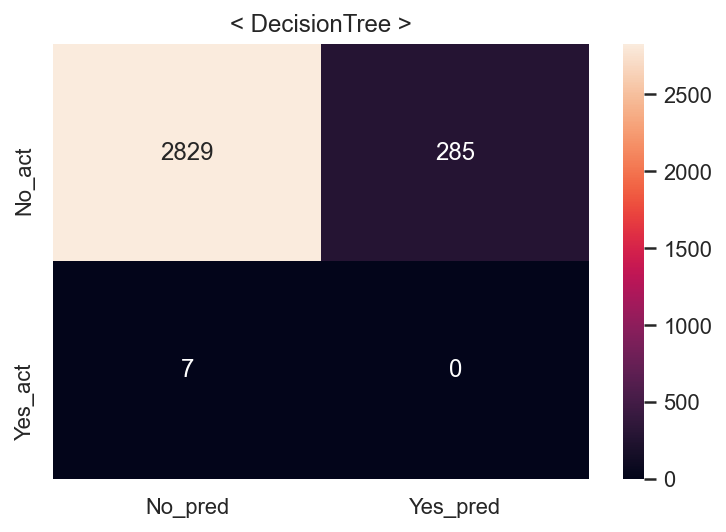

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


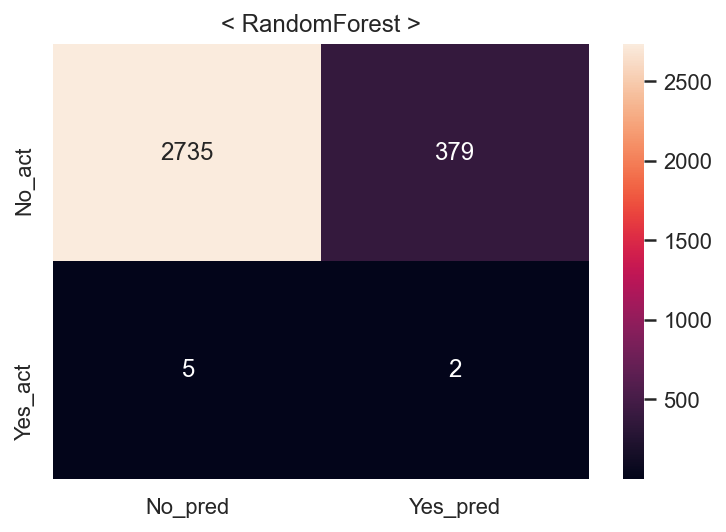

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


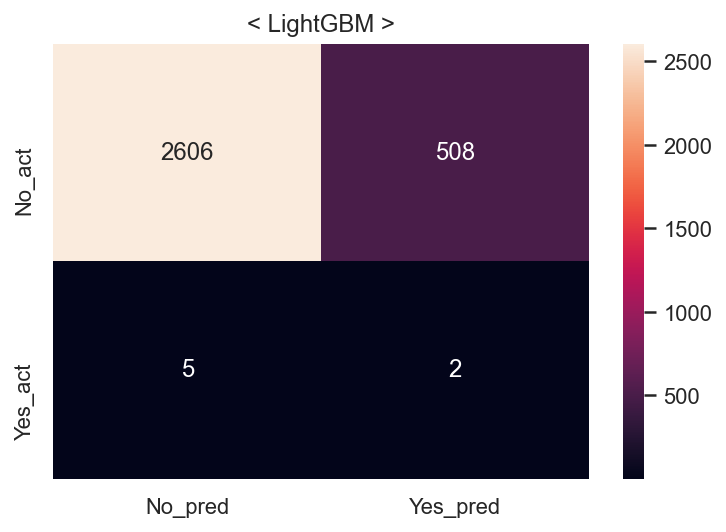

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


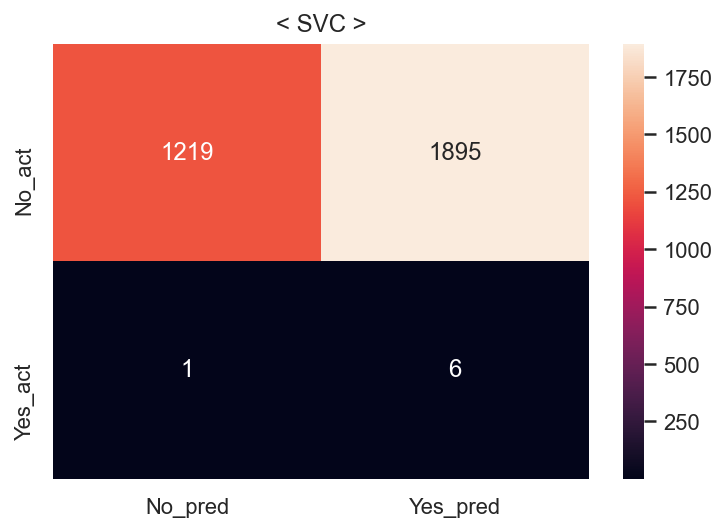

Fit time : 1.49 min


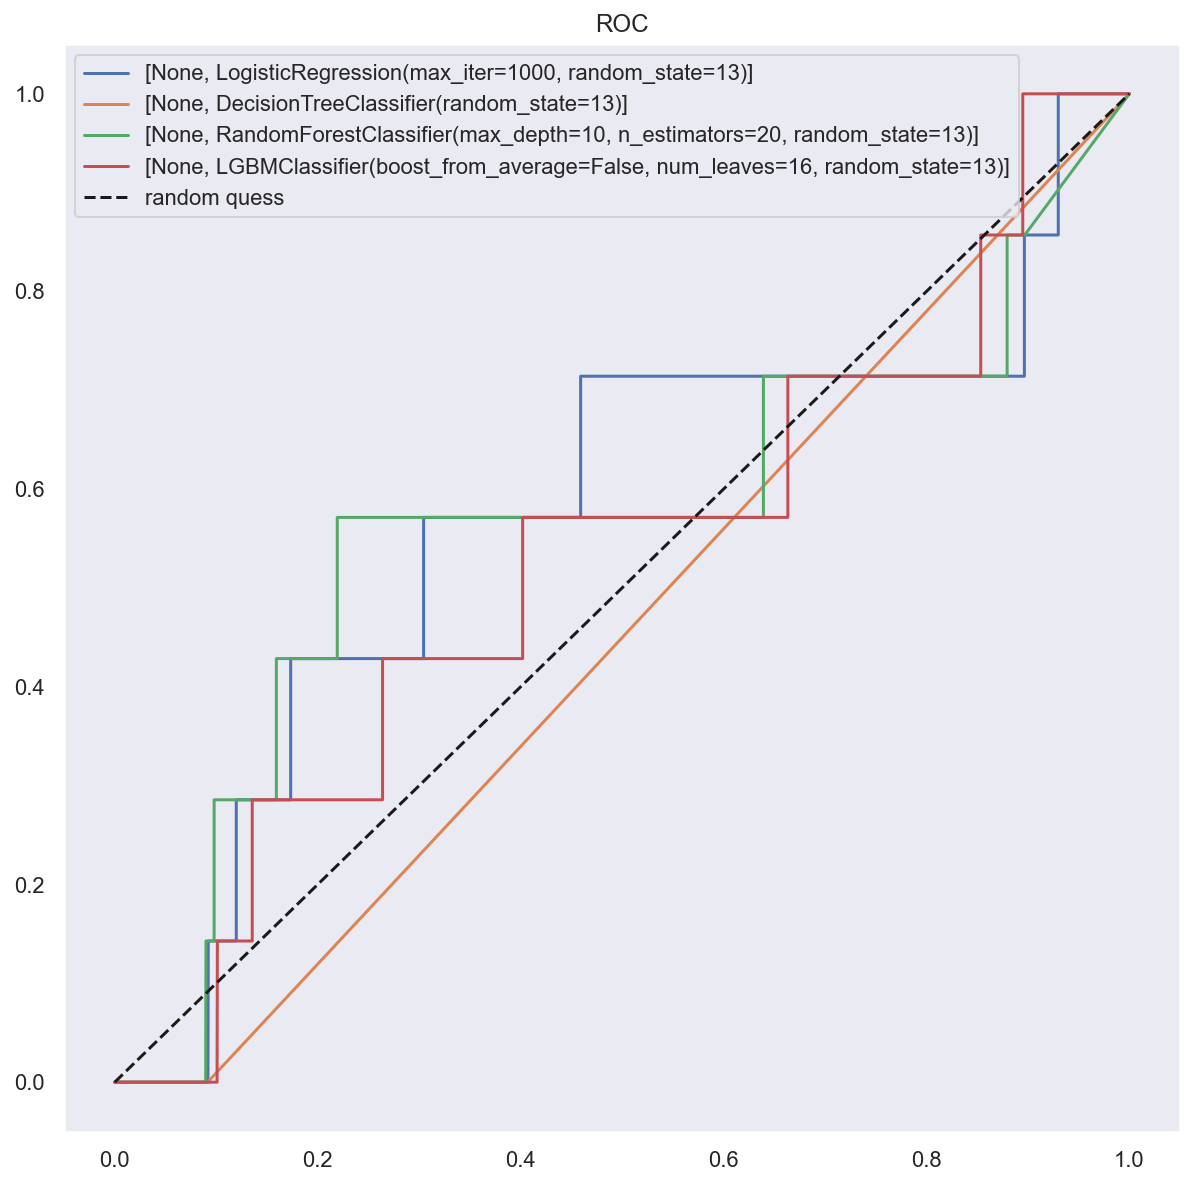

In [59]:
cv_list4, result_df4 = ut.fit_cv(socar_train_pca_pd4, y_train_over, socar_test_pca_pd4, y_test, scaler='No')

In [60]:
result_df4["PCA"] = [1]  * len(result_df4)
result_df4["encoded"] = [0]  * len(result_df4)
result_df4["scaler"] = ["RB"]  * len(result_df4)
result_df4["sampler"] = ["SMOTE"]  * len(result_df4)
result_df4 = result_df4[['PCA', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df4

,PCA,encoded,scaler,sampler,classifier,train accuracy,train precision,train recall,train f1,train auc,test accuracy,test precision,test recall,test f1,test auc
0,1,0,RB,SMOTE,LogisticReg,0.833021,0.814965,0.861684,0.837674,0.833021,0.513297,0.003285,0.714286,0.006540,0.613565
1,1,0,RB,SMOTE,DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000,0.906440,0.000000,0.000000,0.000000,0.454239
2,1,0,RB,SMOTE,RandomForest,0.976960,0.956223,0.999688,0.977472,0.976960,0.876963,0.005249,0.285714,0.010309,0.582003
3,1,0,RB,SMOTE,LightGBM,0.993557,0.989391,0.997813,0.993584,0.993557,0.835630,0.003922,0.285714,0.007737,0.561290
4,1,0,RB,SMOTE,SVC,0.818572,0.758951,0.933693,0.837302,0.818572,0.392502,0.003156,0.857143,0.006289,0.624300


## 다섯번째 ( ADASYN, 스케일링 없음, PCA)
### (1) 데이터 분리, (2) ADASYN, (3) 스케일링 없음

In [49]:
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar)
# sampling to SMOTE (default)
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='ADASYN')


==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12818]]


### (4) PCA 결과를 return하는 함수 만듬

In [76]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=17):  # 23개의 컬럼을 17개로 축소.
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)
    
    return pca.transform(ss_data), pca

- X_train PCA / X_test PCA

In [50]:
socar_train_pca5, train_pca5 = get_pca_data(X_train_over, n_components=17)
socar_test_pca5, test_pca5 = get_pca_data(X_test, n_components=17)

In [51]:
socar_train_pca5.shape, socar_test_pca5.shape

((25622, 17), (3121, 17))

### (5) PCA 결과를 pandas로 정리

In [81]:
def get_pd_from_pca(pca_data, cols=['component_1',
                                    'component_2',
                                    'component_3',
                                    'component_4',
                                    'component_5',
                                    'component_6',
                                    'component_7',
                                    'component_8',
                                    'component_9',
                                    'component_10',
                                    'component_11',
                                    'component_12',
                                    'component_13',
                                    'component_14',
                                    'component_15',
                                    'component_16',
                                    'component_17']):
    return pd.DataFrame(pca_data, columns=cols)

### X_train PCA ==> DataFrame

In [52]:
socar_train_pca_pd5 = get_pd_from_pca(socar_train_pca5)

In [53]:
socar_train_pca_pd5

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17
0,-837955.482935,-1.243818e+05,-7.438393,1.183060,0.677893,0.127165,0.425359,0.426156,0.053187,-0.662838,-0.224882,0.421377,-0.434517,0.097943,-0.200234,0.601692,-0.577474
1,-794853.819717,1.085605e+06,96.190853,1.424359,1.263509,-0.020748,1.793832,0.988304,0.136942,1.378178,-0.924609,0.977054,0.042337,-0.533309,0.825239,0.411365,-0.575061
2,384705.970368,2.260907e+05,-5.804891,-3.148649,1.111047,-1.292855,-0.992988,0.040728,-0.524102,-0.737870,0.721980,-0.217039,0.341931,0.164182,-0.478132,0.006633,-0.120161
3,373916.011542,-2.978879e+05,-7.310806,0.034171,-3.286624,3.512662,-0.394925,-0.923379,0.881613,0.203846,0.187664,-0.786103,-1.052204,0.056496,-0.090926,0.501387,-0.623751
4,-842592.420812,-2.545539e+05,92.205971,2.283947,-1.256538,-0.258374,1.823506,-1.735631,0.501086,-0.350499,-0.466898,-0.019327,1.012280,0.482668,0.573083,-0.298317,-0.143304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25617,-828404.294255,1.437474e+05,-6.665627,-3.180431,0.259633,-1.371757,-0.852205,-0.049895,0.188452,-0.063204,0.025385,0.718528,0.111371,-0.079572,0.799672,0.080048,0.107864
25618,-833152.027068,1.046494e+04,-7.046006,0.966357,0.278897,-1.115244,-1.273692,-0.190553,0.079077,0.148221,0.090856,0.382507,-0.870311,0.011692,0.834736,0.033383,0.075851
25619,-827733.607366,1.625755e+05,5.410171,-3.251318,-0.913684,-0.898194,-0.354821,-1.482925,0.626060,0.355527,0.004421,0.504703,0.189243,-0.087919,-0.234264,-0.052233,-0.049148
25620,-830217.955786,9.283272e+04,-6.786785,0.471996,0.470149,-0.366077,0.473305,-1.240915,-0.848373,-0.230575,-0.384276,0.341817,0.534711,0.482797,0.175393,-0.021814,-0.050044


### X_test PCA ==> DataFrame

In [54]:
socar_test_pca_pd5 = get_pd_from_pca(socar_test_pca5)

In [55]:
socar_test_pca_pd5

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17
0,-9.588728e+05,-256839.796243,86.215308,1.370367,3.343832,-0.114374,1.293302,-0.308081,0.616268,0.129090,0.425779,-1.016825,0.493512,-0.372124,-0.433119,0.326783,0.761286
1,1.196701e+07,-468432.468227,-8.072499,-0.480555,4.667459,1.500694,0.808319,0.663606,0.739232,0.409684,0.470328,-0.846781,0.401132,-0.469732,-0.271467,0.585535,0.173687
2,3.815004e+06,-430384.177886,-12.462530,-3.541294,-0.866906,-0.054126,-0.931016,-0.231496,0.901151,-0.791238,0.116809,0.541614,-0.031914,-0.644156,-0.567538,-0.081836,0.254833
3,-6.992994e+05,1963.519739,-11.483016,0.769979,-2.470857,-0.034504,1.889591,2.783566,-0.141712,0.422812,0.870496,1.014141,0.153495,0.119325,0.091471,0.561946,-0.359732
4,-9.371731e+05,340079.670941,-8.857257,-2.168120,0.243682,1.439004,0.891345,0.660453,-1.026624,-1.476178,-0.787422,0.563169,-0.179286,-0.739008,0.189216,-0.461619,0.479540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,7.487192e+05,-318915.762538,-13.283789,-2.794481,0.372449,-1.643067,-0.087353,1.478922,-2.019022,0.071901,0.843221,-0.724747,-0.381756,0.076347,0.322526,-0.330602,-0.355718
3117,-9.588728e+05,-256839.795417,-13.802140,-2.976799,-0.046989,2.893134,-0.655004,1.577345,-2.266137,1.499225,0.776630,0.371651,0.115660,-0.751145,0.139335,-0.277869,0.198074
3118,-1.364680e+05,63343.074086,-10.664510,-0.342598,-3.290843,-1.630020,-0.581460,0.098871,0.865595,-0.208192,-0.054658,0.332943,-0.276823,0.234977,0.050985,-0.107104,-0.378076
3119,-9.194070e+05,828789.901454,-4.840299,3.538563,1.080616,2.225282,-0.769617,-0.003932,0.913636,0.986473,1.138802,0.018648,0.414868,0.304309,0.149747,-0.196468,-0.338569


### 모델링

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


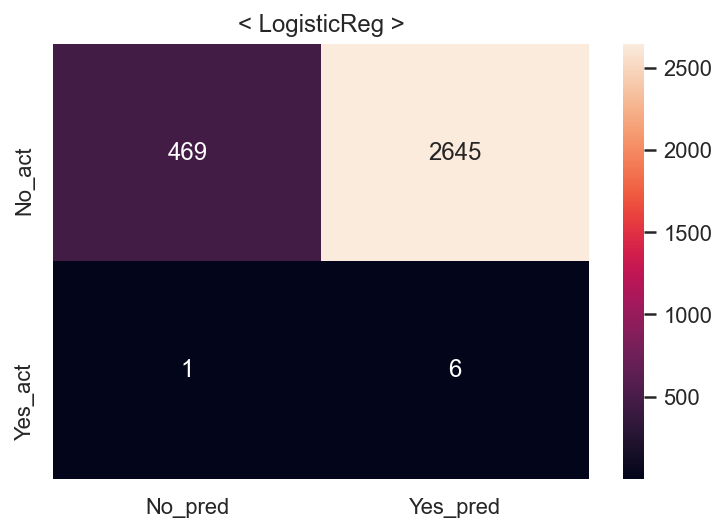

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


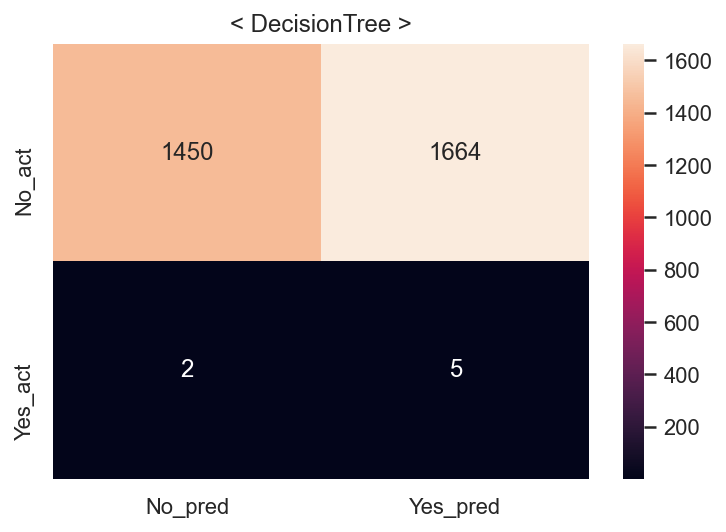

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


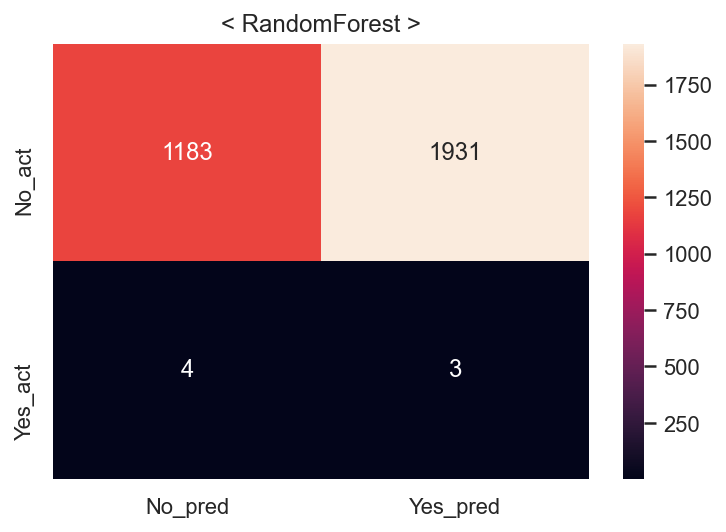

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


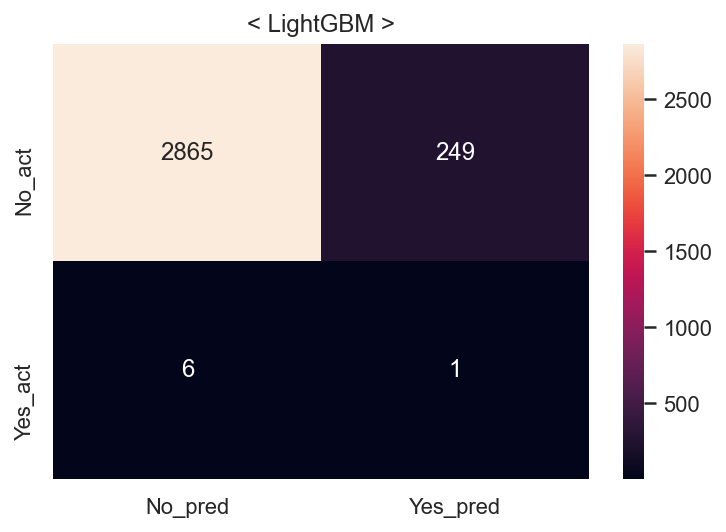

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


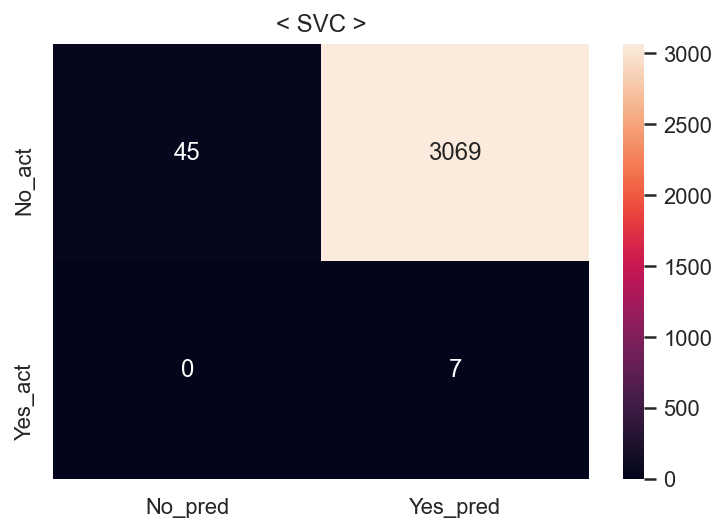

Fit time : 9.0 min


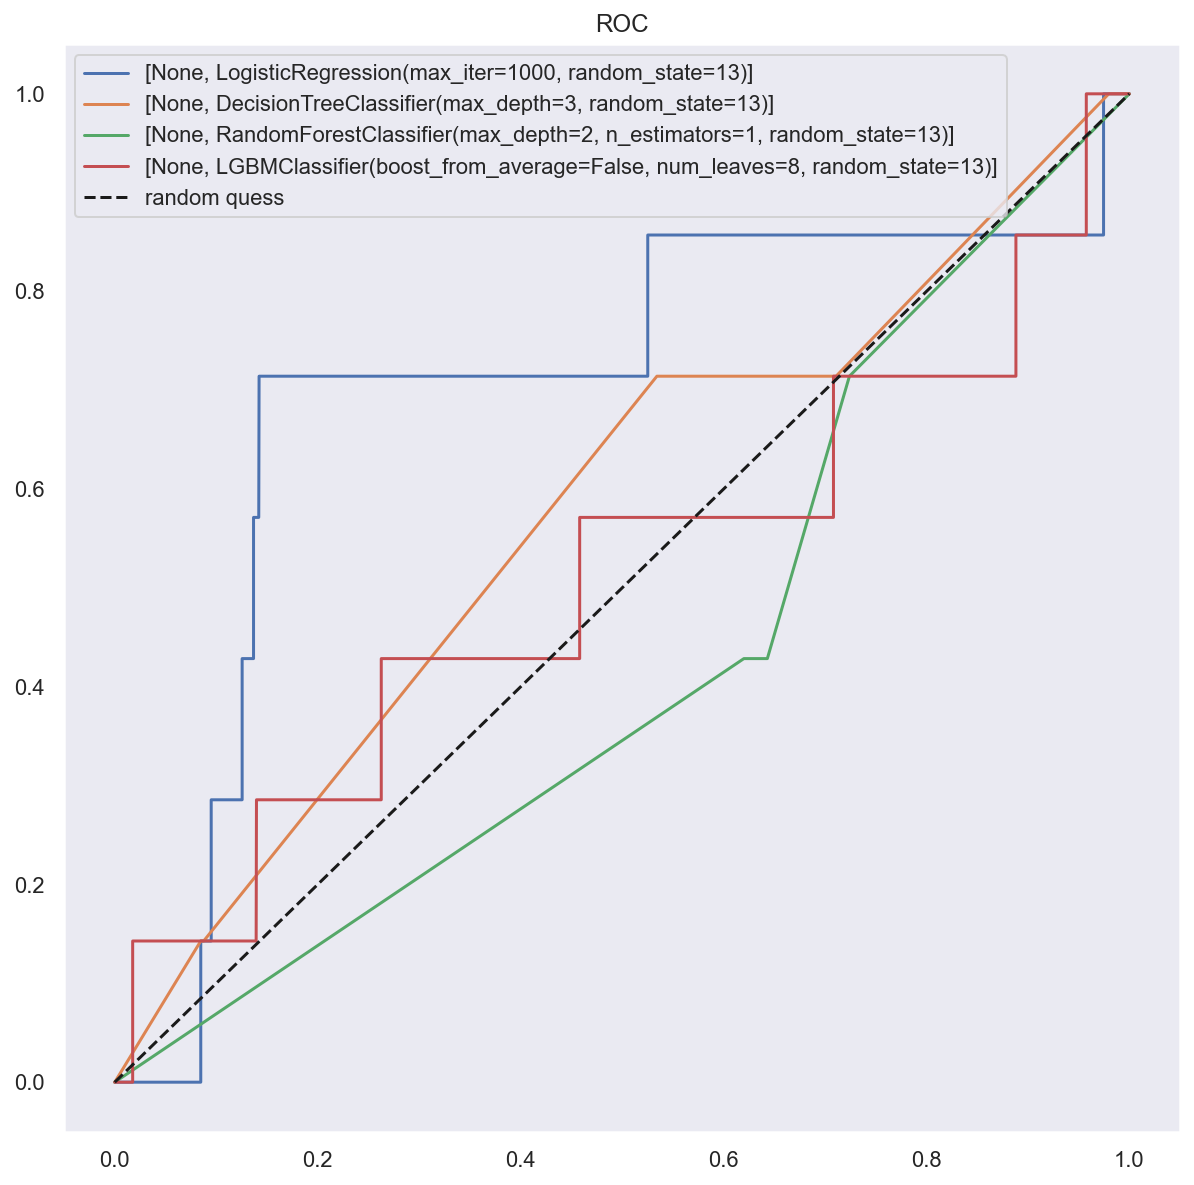

In [86]:
cv_list5, result_df5 = ut.fit_cv(socar_train_pca_pd5, y_train_over, socar_test_pca_pd5, y_test, scaler='No')

In [87]:
result_df5

,classifier,train accuracy,train precision,train recall,train f1,train auc,test accuracy,test precision,test recall,test f1,test auc
0,LogisticReg,0.538873,0.521993,0.928616,0.668314,0.538660,0.152195,0.002263,0.857143,0.004515,0.503877
1,DecisionTree,0.737647,0.659364,0.983851,0.789569,0.737513,0.466197,0.002996,0.714286,0.005967,0.589962
2,RandomForest,0.698657,0.632658,0.948198,0.758937,0.698521,0.380006,0.001551,0.428571,0.003091,0.404234
3,LightGBM,0.978183,0.962848,0.994773,0.978550,0.978174,0.918295,0.004000,0.142857,0.007782,0.531448
4,SVC,0.505386,0.502844,1.000000,0.669190,0.505116,0.016661,0.002276,1.000000,0.004541,0.507225


In [88]:
result_df5["PCA"] = [1]  * len(result_df5)
result_df5["encoded"] = [0]  * len(result_df5)
result_df5["scaler"] = ["None"]  * len(result_df5)
result_df5["sampler"] = ["ADASYN"]  * len(result_df5)
result_df5 = result_df5[['PCA', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df5

,PCA,encoded,scaler,sampler,classifier,train accuracy,train precision,train recall,train f1,train auc,test accuracy,test precision,test recall,test f1,test auc
0,1,0,None,ADASYN,LogisticReg,0.538873,0.521993,0.928616,0.668314,0.538660,0.152195,0.002263,0.857143,0.004515,0.503877
1,1,0,None,ADASYN,DecisionTree,0.737647,0.659364,0.983851,0.789569,0.737513,0.466197,0.002996,0.714286,0.005967,0.589962
2,1,0,None,ADASYN,RandomForest,0.698657,0.632658,0.948198,0.758937,0.698521,0.380006,0.001551,0.428571,0.003091,0.404234
3,1,0,None,ADASYN,LightGBM,0.978183,0.962848,0.994773,0.978550,0.978174,0.918295,0.004000,0.142857,0.007782,0.531448
4,1,0,None,ADASYN,SVC,0.505386,0.502844,1.000000,0.669190,0.505116,0.016661,0.002276,1.000000,0.004541,0.507225


## 여섯번째 (ADASYN, MinMax 스케일링, PCA)
### (1) 데이터 분리, (2) ADASYN

In [56]:
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar)
# sampling to SMOTE (default)
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='ADASYN')


==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12818]]


### (3) 스케일링 (MinMax)

In [57]:
from sklearn.preprocessing import MinMaxScaler

X_train_mm6 = MinMaxScaler().fit_transform(X_train_over)
X_train_mm6 = pd.DataFrame(X_train_mm6, columns=X_train_over.columns)
X_test_mm6 = MinMaxScaler().fit_transform(X_test)
X_test_mm6 = pd.DataFrame(X_test_mm6, columns=X_test.columns)

### (4) PCA

- X_train PCA / X_test PCA

In [58]:
# X_train_over => MinMax scaling => socar_train_pca2
socar_train_pca6, train_pca6 = get_pca_data(X_train_mm6, n_components=17)
# X_test =>  MinMax scaling => socar_test_pca2
socar_test_pca6, test_pca6 = get_pca_data(X_test_mm6, n_components=17)

In [59]:
socar_train_pca6.shape, socar_test_pca6.shape

((25622, 17), (3121, 17))

### (5) PCA 결과를 pandas로 정리

In [18]:
def get_pd_from_pca(pca_data, cols=['component_1',
                                    'component_2',
                                    'component_3',
                                    'component_4',
                                    'component_5',
                                    'component_6',
                                    'component_7',
                                    'component_8',
                                    'component_9',
                                    'component_10',
                                    'component_11',
                                    'component_12',
                                    'component_13',
                                    'component_14',
                                    'component_15',
                                    'component_16',
                                    'component_17']):
    return pd.DataFrame(pca_data, columns=cols)

### X_train PCA ==> DataFrame

In [60]:
socar_train_pca_pd6 = get_pd_from_pca(socar_train_pca6)

In [61]:
socar_train_pca_pd6

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17
0,-0.178036,-0.380757,0.174807,0.323284,0.453515,0.424322,-0.164602,-0.510647,-0.191138,0.294482,0.249377,-0.009596,0.062187,-0.040069,-0.022910,0.035007,0.005344
1,-0.277989,0.361042,0.995286,0.039187,0.228367,0.506188,0.358892,-0.521472,-0.276087,0.244189,0.003447,0.956066,0.363379,-0.068318,-0.193491,0.157656,-0.047744
2,-0.366107,-0.143373,-0.780629,-0.379179,0.066504,-0.040753,0.103985,-0.156421,0.067411,0.116119,-0.028646,-0.135429,0.087344,0.051846,0.025658,-0.078319,-0.022590
3,1.347431,-0.060852,0.714119,0.112173,0.344853,0.311813,-0.557504,-0.229384,-0.520472,0.436991,0.157780,-0.094160,-0.232818,0.350700,-0.022457,-0.154112,0.313519
4,1.111352,-0.097847,0.268015,0.223786,-0.404485,-0.089401,0.217406,-0.271234,-0.098536,-0.417053,-0.227509,0.646888,0.540893,0.060247,-0.124860,0.017148,-0.161790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25617,-0.593535,0.757467,-0.460401,-0.337501,0.078147,0.096933,0.175577,-0.007421,0.009289,0.052723,-0.087565,-0.038708,0.008604,-0.037188,-0.016936,0.186264,-0.001455
25618,-0.562829,0.659053,0.011128,0.187082,0.251914,-0.277136,-0.073253,0.120110,0.023105,0.199128,-0.037952,-0.036158,0.054389,-0.093312,0.038233,0.117808,-0.004476
25619,0.832424,0.184018,-0.666174,-0.424363,-0.081683,0.002901,0.061749,-0.058350,-0.003767,0.131635,-0.075146,0.064444,-0.014147,-0.048755,-0.027959,0.133699,-0.123506
25620,-0.203380,-0.331694,-0.143976,-0.058897,-0.392431,-0.104964,0.039275,-0.232530,-0.054872,-0.023671,0.052415,-0.029153,0.104151,-0.140966,-0.059086,0.074748,-0.033353


### X_test PCA ==> DataFrame

In [62]:
socar_test_pca_pd6 = get_pd_from_pca(socar_test_pca6)

In [63]:
socar_test_pca_pd6

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17
0,1.066822,0.632209,0.653334,-0.353109,-0.118542,0.497430,0.843865,-0.555194,0.018696,-0.422854,0.616555,0.049249,-0.185677,-0.049655,-0.188547,-0.192402,-0.042125
1,0.753911,0.436386,1.260029,-0.159843,0.240092,-0.163891,0.149891,-0.142187,0.114760,0.296010,0.101873,0.767588,-0.345700,0.225798,-0.480977,-0.191659,-0.070972
2,0.423382,-1.044875,0.030947,0.472738,-0.710983,0.106227,0.151009,0.530586,0.888638,-0.055974,-0.287853,0.116715,0.312044,0.087330,-0.121939,-0.041658,-0.021237
3,0.747809,0.805081,0.380714,-0.032245,-0.433909,0.129624,-0.578912,0.047026,0.343422,0.033829,-0.530081,-0.096225,0.609118,0.262347,0.402583,0.198614,-0.112683
4,-0.628964,-0.476537,0.426098,0.133344,-0.134787,-0.522455,0.520208,0.557287,0.290190,-0.799066,-0.135809,0.063891,0.084817,-0.031745,-0.030116,0.027189,0.004884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,0.615126,0.208155,-0.177697,-0.482155,-0.321273,-0.653523,-0.329959,0.107868,-0.205111,0.048799,-0.327811,-0.257632,-0.009329,-0.203301,-0.256970,-0.121652,-0.105671
3117,-0.522972,-0.172216,0.566711,-0.654455,-0.512968,-0.606970,0.308751,-0.011013,-0.390567,-0.034889,-0.229129,-0.170959,0.322322,0.524228,-0.197163,0.130436,0.060209
3118,0.388982,-0.501805,-0.637564,0.331340,-0.124677,-0.017010,-0.436988,0.122906,-0.190155,0.261776,-0.099225,-0.054786,-0.062568,-0.146013,0.387000,0.090815,-0.098548
3119,-0.632434,0.207984,-0.144143,-0.907691,0.253389,0.293110,-0.358454,-0.019870,-0.011135,0.112733,0.215759,0.242391,-0.000428,0.386231,-0.038074,0.088925,-0.018832


### 모델링

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


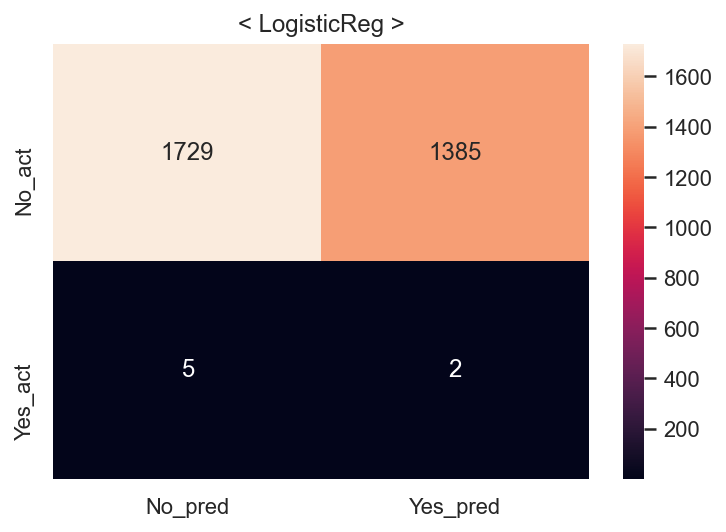

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


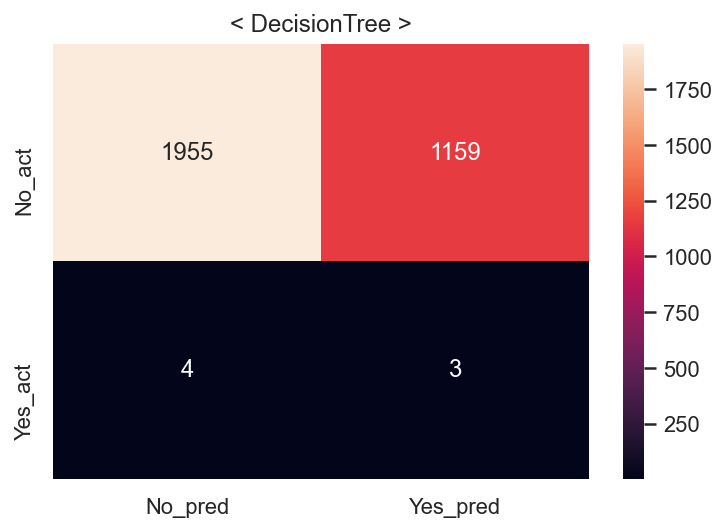

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


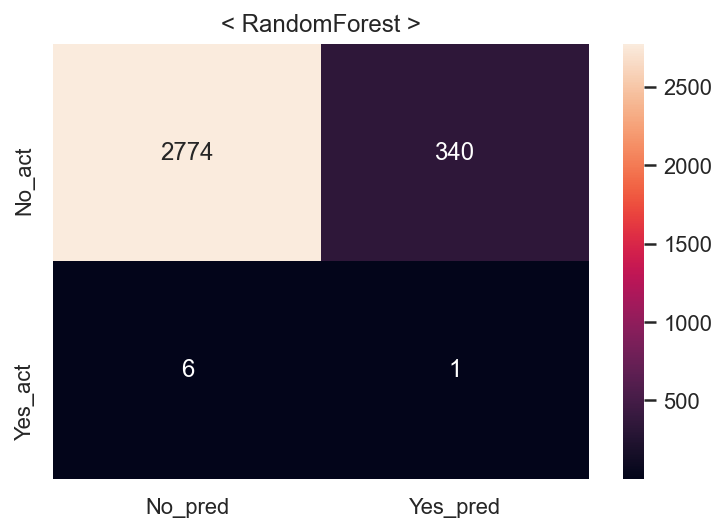

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


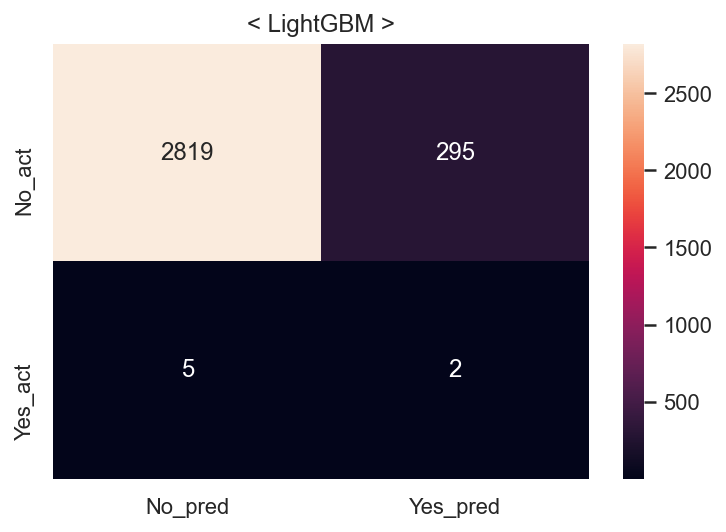

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
cv_list6, result_df6 = ut.fit_cv(socar_train_pca_pd6, y_train_over, socar_test_pca_pd6, y_test, scaler='No')

In [ ]:
result_df6["PCA"] = [1]  * len(result_df6)
result_df6["encoded"] = [0]  * len(result_df6)
result_df6["scaler"] = ["MM"]  * len(result_df6)
result_df6["sampler"] = ["ADASYN"]  * len(result_df6)
result_df6 = result_df6[['PCA', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df6

- 실패...

## 일곱번째 (ADASYN, Standard 스케일링, PCA)
### (1) 데이터 분리, (2) ADASYN

In [64]:
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar)
# sampling to SMOTE (default)
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='ADASYN')


==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12818]]


### (3) 스케일링 (Standard)

In [65]:
X_train_over

,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,...,c_15,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24
0,2,1,3,0,2,0,100,2,0,0,...,1.302547e+05,0,1,0,0,1,0,0,0,-1
1,3,1,3,0,4,0,0,2,0,0,...,1.341009e+06,0,3,1,0,1,0,0,0,-1
2,1,0,1,0,1,0,100,1,0,0,...,5.240306e+05,1209410,1,0,0,2,0,0,0,-1
3,1,1,3,0,4,0,100,3,0,0,...,0.000000e+00,1217280,0,0,0,1,1,2,1,2
4,2,0,4,0,4,0,0,1,0,0,...,0.000000e+00,0,1,0,0,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25617,2,0,1,0,1,0,100,1,0,0,...,3.985539e+05,0,1,1,0,1,0,0,0,0
25618,2,0,1,0,1,0,100,2,0,0,...,2.651870e+05,0,1,1,0,1,0,0,0,0
25619,2,0,1,0,2,0,88,1,0,0,...,4.173940e+05,0,1,0,0,1,1,1,1,1
25620,2,0,2,0,3,0,100,1,0,0,...,3.476070e+05,0,1,0,0,1,0,0,0,0


In [66]:
from sklearn.preprocessing import StandardScaler

X_train_ss7 = StandardScaler().fit_transform(X_train_over)
X_train_ss7 = pd.DataFrame(X_train_ss7, columns=X_train_over.columns)
X_test_ss7 = MinMaxScaler().fit_transform(X_test)
X_test_ss7 = pd.DataFrame(X_test_ss7, columns=X_test.columns)

### (4) PCA

- X_train PCA / X_test PCA

In [67]:
# X_train_over => MinMax scaling => socar_train_pca2
socar_train_pca7, train_pca7 = get_pca_data(X_train_ss7, n_components=17)
# X_test =>  MinMax scaling => socar_test_pca2
socar_test_pca7, test_pca7 = get_pca_data(X_test_ss7, n_components=17)

In [68]:
socar_train_pca7.shape, socar_test_pca7.shape

((25622, 17), (3121, 17))

### (5) PCA 결과를 pandas로 정리

In [28]:
def get_pd_from_pca(pca_data, cols=['component_1',
                                    'component_2',
                                    'component_3',
                                    'component_4',
                                    'component_5',
                                    'component_6',
                                    'component_7',
                                    'component_8',
                                    'component_9',
                                    'component_10',
                                    'component_11',
                                    'component_12',
                                    'component_13',
                                    'component_14',
                                    'component_15',
                                    'component_16',
                                    'component_17']):
    return pd.DataFrame(pca_data, columns=cols)

### X_train PCA ==> DataFrame

In [69]:
socar_train_pca_pd7 = get_pd_from_pca(socar_train_pca7)

In [70]:
socar_train_pca_pd7

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17
0,-1.027986,1.479123,-1.082930,-0.170695,0.286675,1.036590,-0.994058,1.737579,0.273260,-0.231375,-1.393223,-0.762080,0.793958,0.071320,-1.061533,-0.292093,-0.655215
1,-0.707435,3.484698,1.257883,-0.094559,-0.621020,0.017001,0.077681,3.097614,-0.246404,-1.450490,-0.533558,1.378771,1.762024,-0.334783,-2.597242,2.676604,-0.427508
2,-1.518446,-2.220023,1.277010,-0.191908,-0.486921,0.112338,0.020516,0.608689,0.882991,0.270335,0.360839,-0.264980,-0.432049,0.051497,-0.118757,-0.395836,0.572402
3,4.820391,1.086264,-0.754816,-0.970846,1.729959,1.962702,-0.739249,0.541100,-0.237740,-0.643862,-0.768454,-0.254305,0.237210,0.708750,-1.145782,-0.678453,-2.349464
4,4.120510,1.824712,-0.647550,-0.005454,-2.003938,0.076893,0.282613,-0.201648,-0.631876,-0.652720,1.517172,0.313680,0.407392,0.664620,-1.830618,2.262190,1.631990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25617,-1.135714,-2.204704,0.460405,-0.111139,-0.043997,-0.947073,0.290161,1.316218,-0.439768,-0.445476,-0.116500,0.728390,0.673886,-0.187755,0.326702,-0.432676,0.420551
25618,-1.107954,-0.597598,-0.407234,1.176494,-0.123299,-0.336317,0.557880,0.385686,-0.946767,-0.806528,-0.138391,0.697402,0.456524,-0.440904,0.331850,-0.306884,-0.734669
25619,2.874482,-2.120559,0.618386,-0.593839,-1.064156,-0.609826,-0.625726,0.726827,-0.000544,-0.031573,-0.197231,0.621919,0.142213,0.161181,0.246533,0.012600,0.217480
25620,-0.792721,-0.298675,0.009060,0.357262,-0.984754,-0.229015,-1.206360,-0.518023,-0.241959,0.302797,0.085103,-0.052111,0.452338,0.235460,-0.458451,-0.181140,0.538969


### X_test PCA ==> DataFrame

In [71]:
socar_test_pca_pd7 = get_pd_from_pca(socar_test_pca7)

In [72]:
socar_test_pca_pd7

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17
0,1.066822,0.632209,0.653334,-0.353109,-0.118542,0.497430,0.843865,-0.555194,0.018696,-0.422854,0.616555,0.049249,-0.185677,-0.049655,-0.188547,-0.192402,-0.042125
1,0.753911,0.436386,1.260029,-0.159843,0.240092,-0.163891,0.149891,-0.142187,0.114760,0.296010,0.101873,0.767588,-0.345700,0.225798,-0.480977,-0.191659,-0.070972
2,0.423382,-1.044875,0.030947,0.472738,-0.710983,0.106227,0.151009,0.530586,0.888638,-0.055974,-0.287853,0.116715,0.312044,0.087330,-0.121939,-0.041658,-0.021237
3,0.747809,0.805081,0.380714,-0.032245,-0.433909,0.129624,-0.578912,0.047026,0.343422,0.033829,-0.530081,-0.096225,0.609118,0.262347,0.402583,0.198614,-0.112683
4,-0.628964,-0.476537,0.426098,0.133344,-0.134787,-0.522455,0.520208,0.557287,0.290190,-0.799066,-0.135809,0.063891,0.084817,-0.031745,-0.030116,0.027189,0.004884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,0.615126,0.208155,-0.177697,-0.482155,-0.321273,-0.653523,-0.329959,0.107868,-0.205111,0.048799,-0.327811,-0.257632,-0.009329,-0.203301,-0.256970,-0.121652,-0.105671
3117,-0.522972,-0.172216,0.566711,-0.654455,-0.512968,-0.606970,0.308751,-0.011013,-0.390567,-0.034889,-0.229129,-0.170959,0.322322,0.524228,-0.197163,0.130436,0.060209
3118,0.388982,-0.501805,-0.637564,0.331340,-0.124677,-0.017010,-0.436988,0.122906,-0.190155,0.261776,-0.099225,-0.054786,-0.062568,-0.146013,0.387000,0.090815,-0.098548
3119,-0.632434,0.207984,-0.144143,-0.907691,0.253389,0.293110,-0.358454,-0.019870,-0.011135,0.112733,0.215759,0.242391,-0.000428,0.386231,-0.038074,0.088925,-0.018832


### 모델링

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


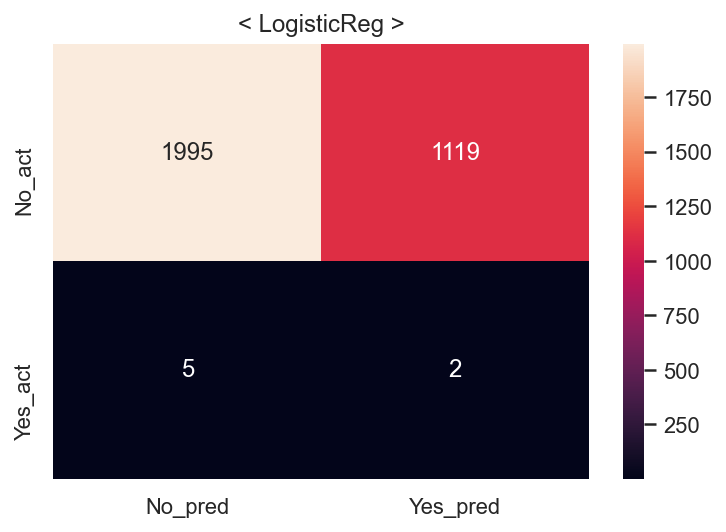

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


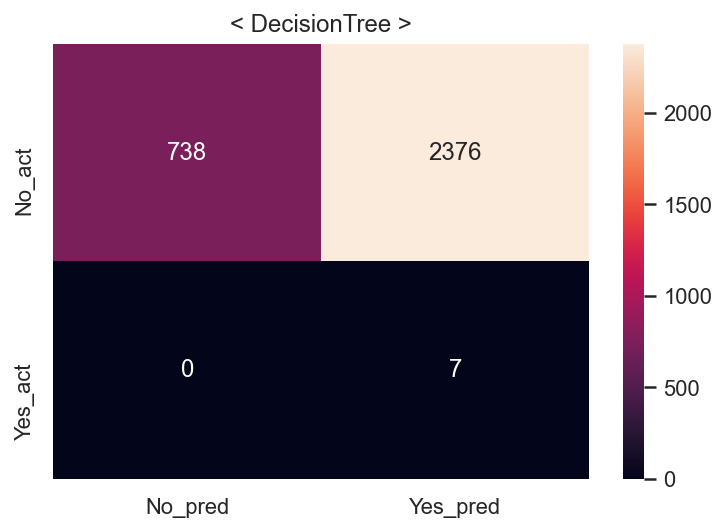

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


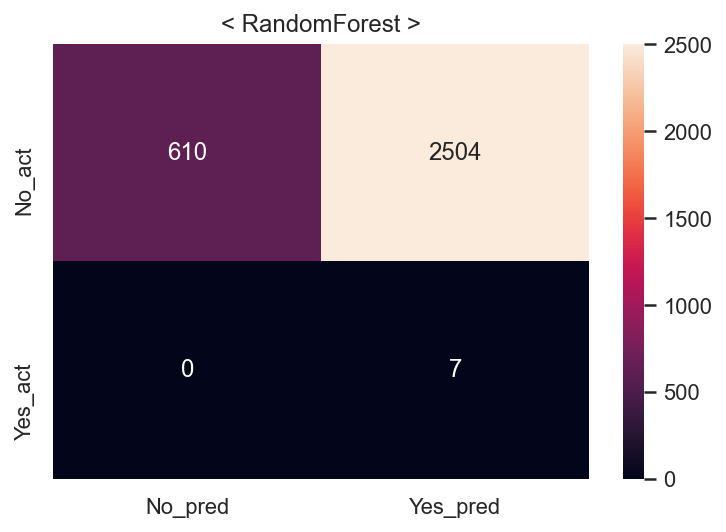

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


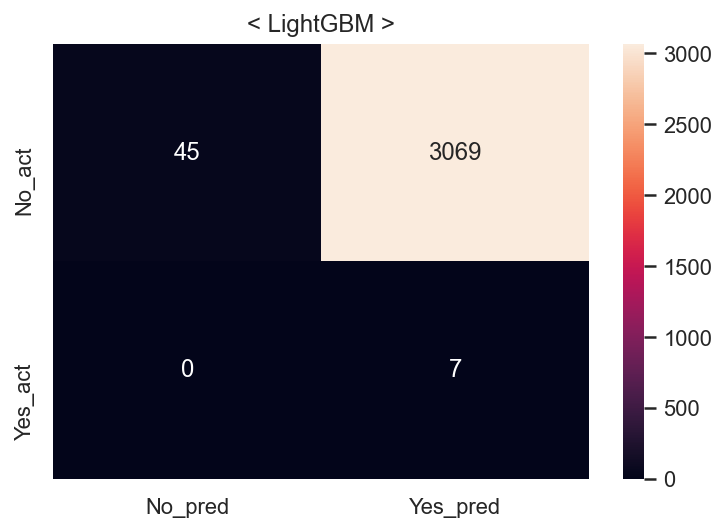

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


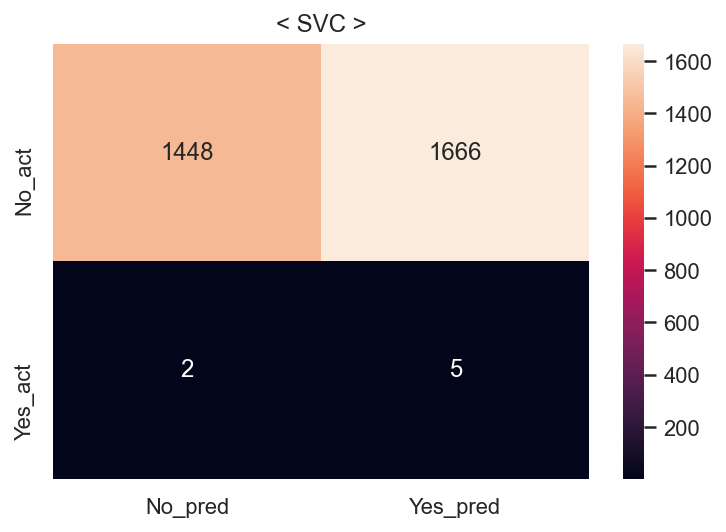

Fit time : 0.66 min


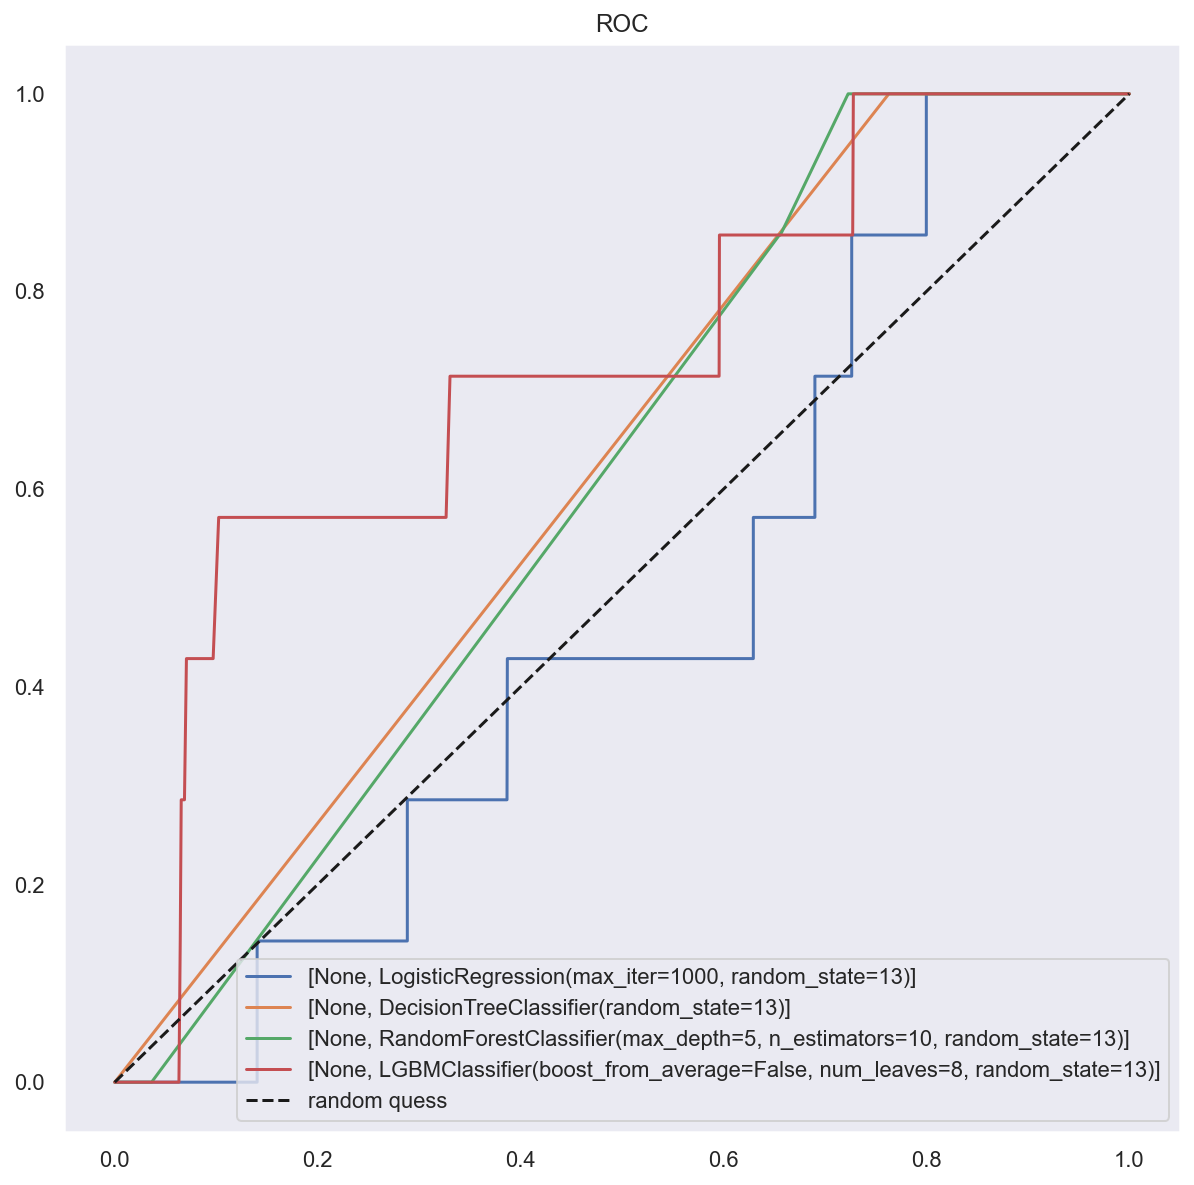

In [19]:
cv_list7, result_df7 = ut.fit_cv(socar_train_pca_pd7, y_train_over, socar_test_pca_pd7, y_test, scaler='No')

In [20]:
result_df7["PCA"] = [1]  * len(result_df7)
result_df7["encoded"] = [0]  * len(result_df7)
result_df7["scaler"] = ["SD"]  * len(result_df7)
result_df7["sampler"] = ["ADASYN"]  * len(result_df7)
result_df7 = result_df7[['PCA', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df7

,PCA,encoded,scaler,sampler,classifier,train accuracy,train precision,train recall,train f1,train auc,test accuracy,test precision,test recall,test f1,test auc
0,1,0,SD,ADASYN,LogisticReg,0.824682,0.799023,0.867842,0.832012,0.824658,0.639859,0.001784,0.285714,0.003546,0.463185
1,1,0,SD,ADASYN,DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000,0.238706,0.002937,1.000000,0.005858,0.618497
2,1,0,SD,ADASYN,RandomForest,0.898603,0.841121,0.982993,0.906540,0.898557,0.197693,0.002788,1.000000,0.005560,0.597945
3,1,0,SD,ADASYN,LightGBM,0.971197,0.949472,0.995397,0.971892,0.971183,0.016661,0.002276,1.000000,0.004541,0.507225
4,1,0,SD,ADASYN,SVC,0.969635,0.947783,0.994071,0.970375,0.969622,0.465556,0.002992,0.714286,0.005959,0.589641


## 여덟번째 (ADASYN, Robust 스케일링, PCA)
### (1) 데이터 분리, (2) SMOTE

In [73]:
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar)
# sampling to SMOTE (default)
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='ADASYN')


==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12818]]


### (3) 스케일링 (Robust)

In [74]:
X_train_over

,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,...,c_15,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24
0,2,1,3,0,2,0,100,2,0,0,...,1.302547e+05,0,1,0,0,1,0,0,0,-1
1,3,1,3,0,4,0,0,2,0,0,...,1.341009e+06,0,3,1,0,1,0,0,0,-1
2,1,0,1,0,1,0,100,1,0,0,...,5.240306e+05,1209410,1,0,0,2,0,0,0,-1
3,1,1,3,0,4,0,100,3,0,0,...,0.000000e+00,1217280,0,0,0,1,1,2,1,2
4,2,0,4,0,4,0,0,1,0,0,...,0.000000e+00,0,1,0,0,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25617,2,0,1,0,1,0,100,1,0,0,...,3.985539e+05,0,1,1,0,1,0,0,0,0
25618,2,0,1,0,1,0,100,2,0,0,...,2.651870e+05,0,1,1,0,1,0,0,0,0
25619,2,0,1,0,2,0,88,1,0,0,...,4.173940e+05,0,1,0,0,1,1,1,1,1
25620,2,0,2,0,3,0,100,1,0,0,...,3.476070e+05,0,1,0,0,1,0,0,0,0


In [75]:
from sklearn.preprocessing import RobustScaler

X_train_rb8 = RobustScaler().fit_transform(X_train_over)
X_train_rb8 = pd.DataFrame(X_train_rb8, columns=X_train_over.columns)
X_test_rb8 = MinMaxScaler().fit_transform(X_test)
X_test_rb8 = pd.DataFrame(X_test_rb8, columns=X_test.columns)

### (4) PCA

- X_train PCA / X_test PCA

In [76]:
# X_train_over => MinMax scaling => socar_train_pca2
socar_train_pca8, train_pca8 = get_pca_data(X_train_rb8, n_components=17)
# X_test =>  MinMax scaling => socar_test_pca2
socar_test_pca8, test_pca8 = get_pca_data(X_test_rb8, n_components=17)

In [77]:
socar_train_pca8.shape, socar_test_pca8.shape

((25622, 17), (3121, 17))

### (5) PCA 결과를 pandas로 정리

In [28]:
def get_pd_from_pca(pca_data, cols=['component_1',
                                    'component_2',
                                    'component_3',
                                    'component_4',
                                    'component_5',
                                    'component_6',
                                    'component_7',
                                    'component_8',
                                    'component_9',
                                    'component_10',
                                    'component_11',
                                    'component_12',
                                    'component_13',
                                    'component_14',
                                    'component_15',
                                    'component_16',
                                    'component_17']):
    return pd.DataFrame(pca_data, columns=cols)

### X_train PCA ==> DataFrame

In [78]:
socar_train_pca_pd8 = get_pd_from_pca(socar_train_pca8)

In [79]:
socar_train_pca_pd8

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17
0,-6.637731,-1.063657,-0.246711,0.664674,-0.391082,0.548166,-0.139705,-0.544722,-0.128423,0.036921,0.107918,0.479783,0.194570,-0.047667,0.051510,0.536823,-0.619556
1,93.349488,-0.003992,3.760514,0.981670,-0.301965,0.428390,-0.123080,-1.395664,0.087123,0.616683,0.604455,-0.439225,-0.659689,0.657072,-0.391473,0.344971,-0.601787
2,-6.661884,0.384908,0.870983,0.336025,-0.701582,-1.011130,0.353404,0.949152,0.630005,-0.069556,-0.249380,0.479349,0.275043,-0.390451,0.110546,0.016598,-0.124528
3,-6.621073,0.565871,-1.594154,-2.165412,1.770224,1.389468,-1.260182,0.490009,-0.589670,-0.328627,0.052325,-0.341508,0.031008,0.074060,0.791890,0.399012,-0.640442
4,93.377220,-0.135776,-0.716927,-1.569222,1.209989,0.062397,0.466839,-0.478786,-0.520687,0.472421,-0.707092,-0.205785,0.356071,0.603664,-0.593713,-0.304548,-0.119653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25617,-6.646533,-0.934239,0.424370,-0.197236,0.002689,-1.019469,0.349647,-0.113612,1.015643,-0.124594,0.413983,0.076764,-0.120308,0.710048,-0.054520,0.099443,0.102744
25618,-6.640175,-0.961355,0.035717,0.049456,0.035111,-0.055010,0.207614,-0.311885,0.266158,-1.026643,0.678190,-0.015733,-0.056657,0.589836,-0.182172,0.056900,0.065604
25619,5.367744,-0.699369,0.258791,-1.415568,1.388623,-0.777219,0.151769,-0.038163,0.884999,0.170984,0.053337,0.128032,-0.039966,-0.253331,0.033474,-0.040860,-0.046282
25620,-6.640086,-0.947721,0.292463,-0.145068,0.115304,-0.236495,0.337778,-0.559926,0.247266,-0.051092,-0.746081,-0.151482,0.394446,0.159799,-0.313792,-0.002232,-0.061574


### X_test PCA ==> DataFrame

In [80]:
socar_test_pca_pd8 = get_pd_from_pca(socar_test_pca8)

In [81]:
socar_test_pca_pd8

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17
0,1.066822,0.632209,0.653334,-0.353109,-0.118542,0.497430,0.843865,-0.555194,0.018696,-0.422854,0.616555,0.049249,-0.185677,-0.049655,-0.188547,-0.192402,-0.042125
1,0.753911,0.436386,1.260029,-0.159843,0.240092,-0.163891,0.149891,-0.142187,0.114760,0.296010,0.101873,0.767588,-0.345700,0.225798,-0.480977,-0.191659,-0.070972
2,0.423382,-1.044875,0.030947,0.472738,-0.710983,0.106227,0.151009,0.530586,0.888638,-0.055974,-0.287853,0.116715,0.312044,0.087330,-0.121939,-0.041658,-0.021237
3,0.747809,0.805081,0.380714,-0.032245,-0.433909,0.129624,-0.578912,0.047026,0.343422,0.033829,-0.530081,-0.096225,0.609118,0.262347,0.402583,0.198614,-0.112683
4,-0.628964,-0.476537,0.426098,0.133344,-0.134787,-0.522455,0.520208,0.557287,0.290190,-0.799066,-0.135809,0.063891,0.084817,-0.031745,-0.030116,0.027189,0.004884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,0.615126,0.208155,-0.177697,-0.482155,-0.321273,-0.653523,-0.329959,0.107868,-0.205111,0.048799,-0.327811,-0.257632,-0.009329,-0.203301,-0.256970,-0.121652,-0.105671
3117,-0.522972,-0.172216,0.566711,-0.654455,-0.512968,-0.606970,0.308751,-0.011013,-0.390567,-0.034889,-0.229129,-0.170959,0.322322,0.524228,-0.197163,0.130436,0.060209
3118,0.388982,-0.501805,-0.637564,0.331340,-0.124677,-0.017010,-0.436988,0.122906,-0.190155,0.261776,-0.099225,-0.054786,-0.062568,-0.146013,0.387000,0.090815,-0.098548
3119,-0.632434,0.207984,-0.144143,-0.907691,0.253389,0.293110,-0.358454,-0.019870,-0.011135,0.112733,0.215759,0.242391,-0.000428,0.386231,-0.038074,0.088925,-0.018832


### 모델링

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.3s
====Done Evaluation====
====Done Evaluation====


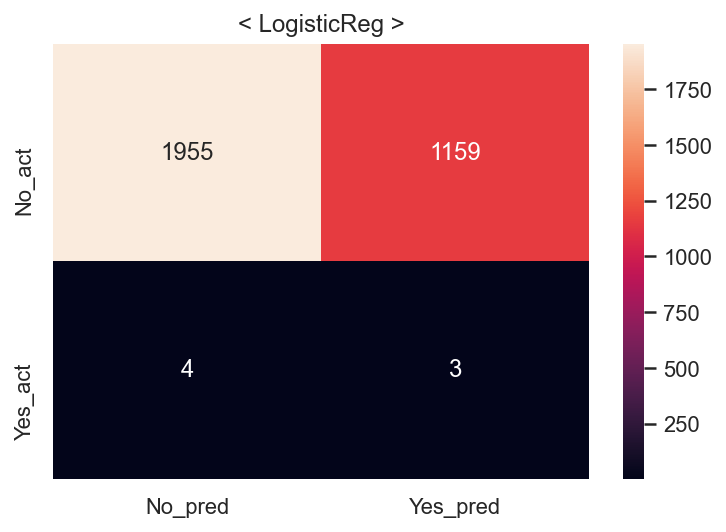

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


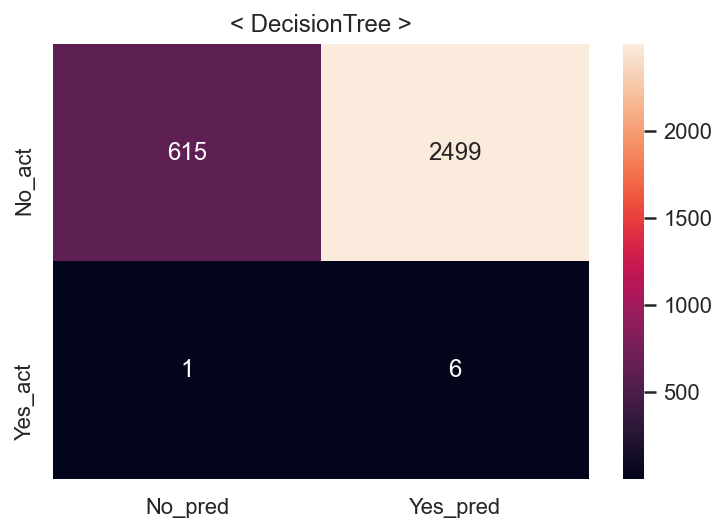

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


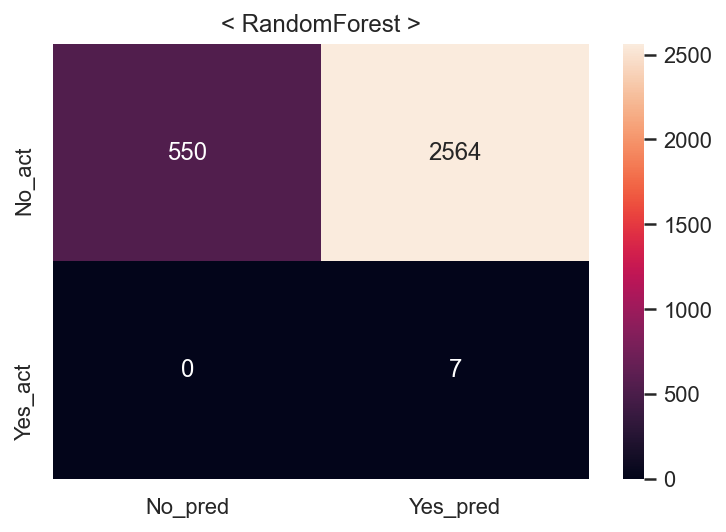

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


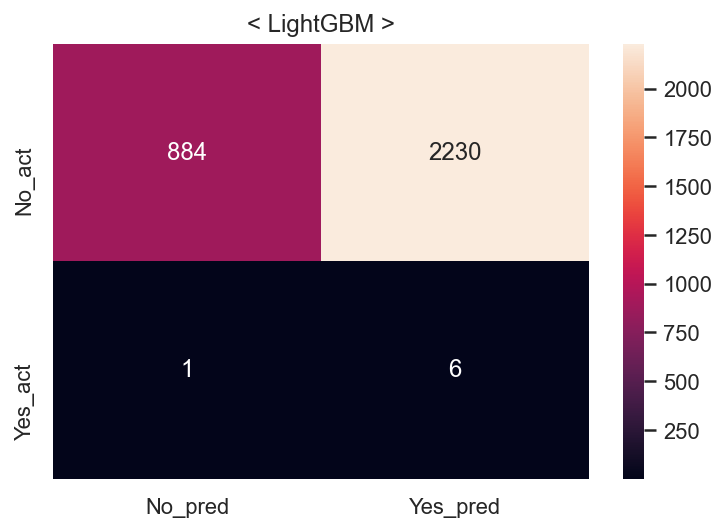

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


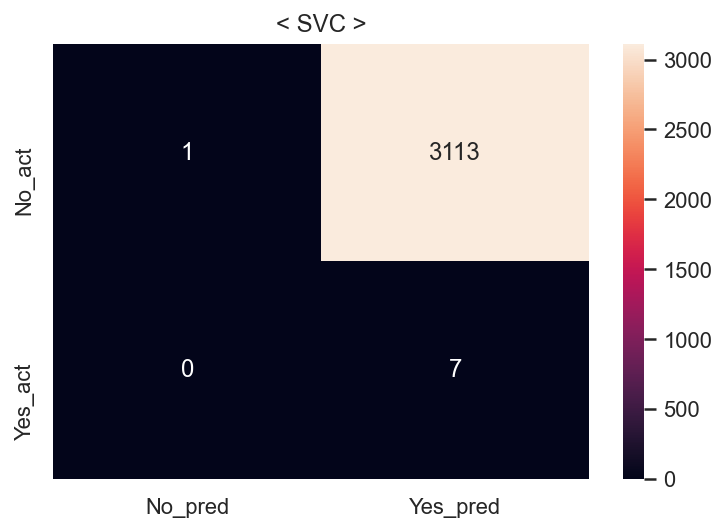

Fit time : 1.13 min


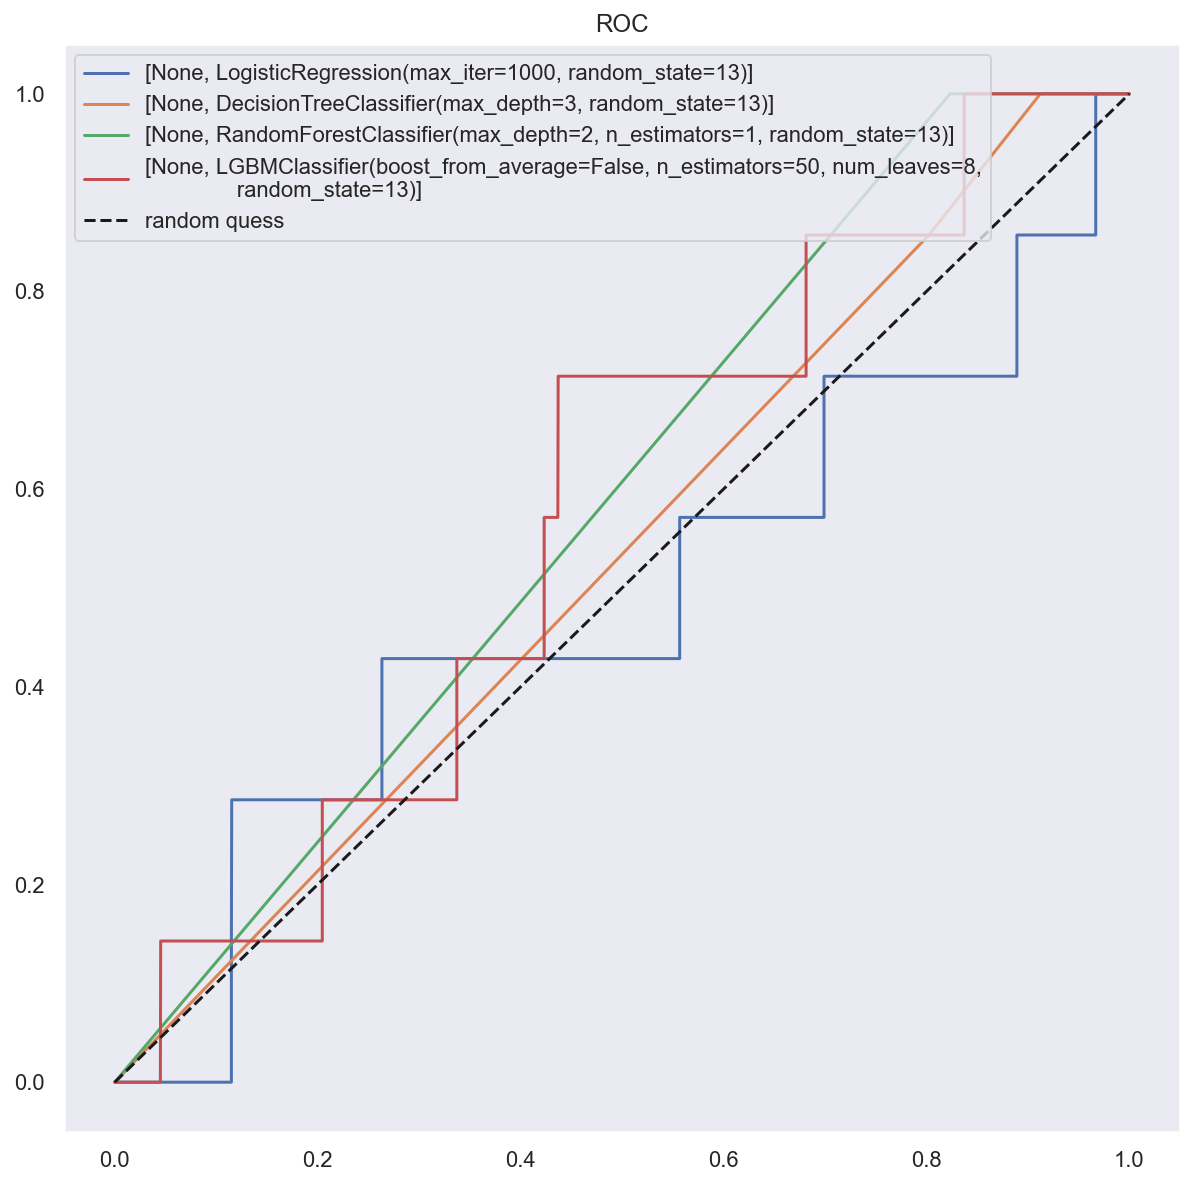

In [30]:
cv_list8, result_df8 = ut.fit_cv(socar_train_pca_pd8, y_train_over, socar_test_pca_pd8, y_test, scaler='No')

In [31]:
result_df8["PCA"] = [1]  * len(result_df8)
result_df8["encoded"] = [0]  * len(result_df8)
result_df8["scaler"] = ["RB"]  * len(result_df8)
result_df8["sampler"] = ["ADASYN"]  * len(result_df8)
result_df8 = result_df8[['PCA', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df8

,PCA,encoded,scaler,sampler,classifier,train accuracy,train precision,train recall,train f1,train auc,test accuracy,test precision,test recall,test f1,test auc
0,1,0,RB,ADASYN,LogisticReg,0.836625,0.817493,0.866984,0.841511,0.836608,0.627363,0.002582,0.428571,0.005133,0.528191
1,1,0,RB,ADASYN,DecisionTree,0.779760,0.730101,0.888048,0.801366,0.779700,0.198975,0.002395,0.857143,0.004777,0.527319
2,1,0,RB,ADASYN,RandomForest,0.691203,0.623019,0.969184,0.758471,0.691051,0.178468,0.002723,1.000000,0.005431,0.588311
3,1,0,RB,ADASYN,LightGBM,0.959098,0.937872,0.983383,0.960088,0.959084,0.285165,0.002683,0.857143,0.005350,0.570511
4,1,0,RB,ADASYN,SVC,0.823355,0.763841,0.936418,0.841371,0.823293,0.002563,0.002244,1.000000,0.004477,0.500161


In [ ]:
# 끝
total = pd.concat([result_df, result_df2, result_df3, result_df4, result_df5, result7, result8], axis=0).reset_index(drop=True)
print(total.shape)
total

In [ ]:
total.to_csv('SMOTE and ADASYN.csv', encoding='utf-8', index=False)

In [1]:
pd.read_csv('SMOTE and ADASYN PCA.csv')

,PCA,encoded,scaler,sampler,classifier,train accuracy,train precision,train recall,train f1,train auc,test accuracy,test precision,test recall,test f1,test auc
0,1,0,None,SMOTE,LogisticReg,0.500000,0.500000,0.325601,0.394381,0.500000,0.679269,0.001004,0.142857,0.001994,0.411666
1,1,0,None,SMOTE,DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000,0.917014,0.007812,0.285714,0.015209,0.602074
2,1,0,None,SMOTE,RandomForest,0.970829,0.945467,0.999297,0.971637,0.970829,0.948414,0.000000,0.000000,0.000000,0.475273
3,1,0,None,SMOTE,LightGBM,0.994611,0.990930,0.998360,0.994631,0.994611,0.941045,0.005587,0.142857,0.010753,0.542848
4,1,0,None,SMOTE,SVC,0.505623,0.502828,1.000000,0.669175,0.505623,0.017302,0.002277,1.000000,0.004544,0.507547
5,1,0,MM,SMOTE,LogisticReg,0.809474,0.781208,0.859731,0.818591,0.809474,0.556873,0.001449,0.285714,0.002884,0.421598
6,1,0,MM,SMOTE,DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000,0.953861,0.007194,0.142857,0.013699,0.549271
7,1,0,MM,SMOTE,RandomForest,0.954389,0.916941,0.999297,0.956350,0.954389,0.976610,0.000000,0.000000,0.000000,0.489403
8,1,0,MM,SMOTE,LightGBM,0.985786,0.974302,0.997891,0.985956,0.985786,0.960910,0.000000,0.000000,0.000000,0.481535
9,1,0,MM,SMOTE,SVC,0.969658,0.945742,0.996485,0.970451,0.969658,0.463633,0.001793,0.428571,0.003571,0.446142
